In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import stdev, mean
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [2]:
# download 2023 Nasdaq-100 daily closing prices
url = 'https://en.m.wikipedia.org/wiki/Nasdaq-100'
df_nasdaq100 = pd.read_html(url, attrs={'id': "constituents"}, index_col='Symbol')[0]
tickers = list(df_nasdaq100.index)
df_nasdaq_100 = yf.download(tickers, '2023-01-01', '2023-12-31')
df_nasdaq_100.head()

[*********************100%***********************]  101 of 101 completed


Price                       Adj Close                                     \
Ticker                           AAPL       ABNB        ADBE         ADI   
Date                                                                       
2023-01-03 00:00:00+00:00  123.768478  84.900002  336.920013  157.418777   
2023-01-04 00:00:00+00:00  125.045029  88.720001  341.410004  160.771637   
2023-01-05 00:00:00+00:00  123.718987  87.709999  328.440002  154.744263   
2023-01-06 00:00:00+00:00  128.271118  88.519997  332.750000  160.393692   
2023-01-09 00:00:00+00:00  128.795624  89.239998  341.980011  161.924774   

Price                                                                     \
Ticker                            ADP        ADSK        AEP        AMAT   
Date                                                                       
2023-01-03 00:00:00+00:00  228.564453  185.149994  87.589439   95.099068   
2023-01-04 00:00:00+00:00  229.641602  187.960007  88.189545   97.635567   
2023-01-05 00:00:00+00:00  224.688721  182.070007  86.583092   96.268997   
2023-01-06 00:00:00+00:00  230.968796  187.190002  89.122055  102.511925   
2023-01-09 00:00:00+00:00  230.343658  192.470001  90.433067  104.694511   

Price                                             ...     Volume           \
Ticker                           AMD        AMGN  ...       TSLA      TTD   
Date                                              ...                       
2023-01-03 00:00:00+00:00  64.019997  245.468063  ...  231402800  2855600   
2023-01-04 00:00:00+00:00  64.660004  248.038559  ...  180389000  4653700   
2023-01-05 00:00:00+00:00  62.330002  250.355804  ...  157986300  3908000   
2023-01-06 00:00:00+00:00  63.959999  258.180084  ...  220911100  3976700   
2023-01-09 00:00:00+00:00  67.239998  253.414185  ...  190284000  4005300   

Price                                                                    \
Ticker                        TTWO      TXN     VRSK     VRTX       WBD   
Date                                                                      
2023-01-03 00:00:00+00:00  1668600  4294100   644400  1100400  25186100   
2023-01-04 00:00:00+00:00  1474800  6285300   603200  1137400  34435900   
2023-01-05 00:00:00+00:00  1218400  6876800   693300  1187000  33761600   
2023-01-06 00:00:00+00:00  2602800  6725900   728700   943400  29842600   
2023-01-09 00:00:00+00:00  2185800  5733900  1095800  1299200  25383800   

Price                                                 
Ticker                        WDAY      XEL       ZS  
Date                                                  
2023-01-03 00:00:00+00:00  2094000  2684500  2510900  
2023-01-04 00:00:00+00:00  1660200  2265900  1617000  
2023-01-05 00:00:00+00:00  3003800  2104500  3931100  
2023-01-06 00:00:00+00:00  1910300  2976200  2613100  
2023-01-09 00:00:00+00:00  1727600  2707800  2961300  

[5 rows x 606 columns]

In [3]:
# 250 trading days
df_nasdaq_100.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Columns: 606 entries, ('Adj Close', 'AAPL') to ('Volume', 'ZS')
dtypes: float64(506), int64(100)
memory usage: 1.2 MB


In [4]:
# convert to log returns
# 249 trading days
df_logr = np.log(df_nasdaq_100['Adj Close']).diff()[1:]
df_logr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2023-01-04 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Columns: 101 entries, AAPL to ZS
dtypes: float64(101)
memory usage: 198.4 KB


In [5]:
# regular returns
# 249 trading days
df_r = np.exp(df_logr)
df_r.head()

Ticker                         AAPL      ABNB      ADBE       ADI       ADP  \
Date                                                                          
2023-01-04 00:00:00+00:00  1.010314  1.044994  1.013327  1.021299  1.004713   
2023-01-05 00:00:00+00:00  0.989395  0.988616  0.962010  0.962510  0.978432   
2023-01-06 00:00:00+00:00  1.036794  1.009235  1.013123  1.036508  1.027950   
2023-01-09 00:00:00+00:00  1.004089  1.008134  1.027739  1.009546  0.997293   
2023-01-10 00:00:00+00:00  1.004456  0.992156  0.990409  1.012687  1.005303   

Ticker                         ADSK       AEP      AMAT       AMD      AMGN  \
Date                                                                          
2023-01-04 00:00:00+00:00  1.015177  1.006851  1.026672  1.009997  1.010472   
2023-01-05 00:00:00+00:00  0.968664  0.981784  0.986003  0.963965  1.009342   
2023-01-06 00:00:00+00:00  1.028121  1.029324  1.064849  1.026151  1.031253   
2023-01-09 00:00:00+00:00  1.028207  1.014710  1.021291  1.051282  0.981540   
2023-01-10 00:00:00+00:00  1.004988  0.993160  1.014555  1.012046  1.013920   

Ticker                     ...      TSLA       TTD      TTWO       TXN  \
Date                       ...                                           
2023-01-04 00:00:00+00:00  ...  1.051249  1.006588  1.035496  1.036517   
2023-01-05 00:00:00+00:00  ...  0.970961  0.961183  0.992414  0.986759   
2023-01-06 00:00:00+00:00  ...  1.024651  0.992956  0.988581  1.049302   
2023-01-09 00:00:00+00:00  ...  1.059349  1.040199  1.003341  1.008678   
2023-01-10 00:00:00+00:00  ...  0.992319  1.019323  1.004091  1.009735   

Ticker                         VRSK      VRTX       WBD      WDAY       XEL  \
Date                                                                          
2023-01-04 00:00:00+00:00  1.016409  1.002832  1.088050  1.011042  1.008563   
2023-01-05 00:00:00+00:00  0.985520  1.003696  1.046243  0.935580  0.979765   
2023-01-06 00:00:00+00:00  1.029498  1.008059  1.042357  1.005930  1.029607   
2023-01-09 00:00:00+00:00  0.995461  0.975949  1.025618  1.011108  1.009679   
2023-01-10 00:00:00+00:00  1.008185  1.019489  1.081826  0.983306  1.001806   

Ticker                           ZS  
Date                                 
2023-01-04 00:00:00+00:00  1.012705  
2023-01-05 00:00:00+00:00  0.935478  
2023-01-06 00:00:00+00:00  0.995881  
2023-01-09 00:00:00+00:00  1.007599  
2023-01-10 00:00:00+00:00  1.002100  

[5 rows x 101 columns]

In [6]:
# makes a random unit vector of n-dimensions
def unit_random_simple(n):
    ws = np.random.random(n)
    return ws / np.sum(ws)

def unit_random_dirichlet(n, bias=1):
    return np.random.dirichlet(np.ones(n)*bias, size=1)[0]
    
def unit_random_angle_projection(n):
    ws = np.tan(np.random.rand(n) * np.pi/2) # unit cirlce projected out to x-axis
    return ws / np.sum(ws)

# makes a vector of n-dimensions, sets weight at positions set_weights, with values weight_values
def set_weights(n, indexes, weight_values):
    ws = np.zeros(n)
    for index, i in enumerate(indexes):
        ws[i] = weight_values[index]
    return ws

# make a random portfolio of length num_tickers, with all but portfolio_size tickers zeroed out
def random_portfolio(num_tickers, portfolio_size=2):
    indexes = np.random.choice(np.arange(num_tickers), size=portfolio_size, replace=False)
    weight_values = unit_random(portfolio_size)
    portfolio_weights = list(set_weights(num_tickers, indexes, weight_values))
    check_sum = np.sum(portfolio_weights)
    if np.abs(1 - check_sum) > 0.01:
        print(indexes)
        print(weight_values)
        print(portfolio_weights)
        assert(False)
    return portfolio_weights

# make many random_portfolios
def random_portfolios(num_tickers, portfolio_size=2, num_simulations=1_000):
    return [random_portfolio(num_tickers, portfolio_size) for _ in range(num_simulations)]

# given per ticker returns in ar for a trading window, compute and return the volatility and return for a portfolio in this trading window
def portfolio_return(ar, portfolio_weights):
    num_tickers = len(ar[0])
    portfolio_returns = []
    for day in range(len(ar)):
        daily_return = sum([portfolio_weights[i]*ar[day][i] for i in range(num_tickers)])
        if daily_return < 0.4:
            print(daily_return)
            print(portfolio_weights)
            print(ar[day])
            assert False
        portfolio_return = np.log(daily_return) # portfolio log return for given day
        portfolio_returns.append(portfolio_return)
    std = np.sqrt(np.var(portfolio_returns))
    avg = np.mean(portfolio_returns)
    return std, avg

# compute and return the volatility and return for many portfolios
def portfolio_returns(df, portfolios):
    ar = np.nan_to_num(df.to_numpy(), nan=1)
    xs, ys = [], []
    for i, portfolio in enumerate(portfolios):
        print(f'Computing return for portfolio {i+1:,} of {len(portfolios):,}      ', end='\r')
        std, avg = portfolio_return(ar, portfolio)
        xs.append(std)
        ys.append(avg)
    return xs, ys

# make num_simulations random portfolios, each with all portfolio_size tickers zeroes out, compute and return the volatily and return for each
def simulate_portfolios(df, portfolio_size=2, num_simulations=10_000):
    num_tickers = len(df.columns.values)
    ps = random_portfolios(num_tickers, portfolio_size, num_simulations)
    return portfolio_returns(df, ps)

In [7]:
def plot_portfolios(bare, portfolios, title, portfolio_point_size=6):
    # per-ticker log mean and variance
    xs, ys = bare
    # compute portfolios
    pxs, pys = portfolios
    # compute convex hull
    axs = xs + pxs
    ays = ys + pys
    points = np.array([[x, y] for x, y in zip(axs, ays)])
    hull = ConvexHull(points)
    # set up plot
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.axhline(0, linestyle='--')
    plt.xlabel('log volatility')
    plt.ylabel('log return')
    plt.title(title)
    plt.xlim((0, 0.05))
    plt.ylim((-0.003, 0.006))
    # plot original points with labels
    ax.scatter(xs, ys)
    for i, ticker in enumerate(df_logr.columns.values):
        ax.annotate(ticker, (xs[i], ys[i]))
    # plot portfolio points
    ax.scatter(pxs, pys, zorder=0, s=portfolio_point_size)
    # save hull simplexes
    hxs = [points[simplex, 0] for simplex in hull.simplices]
    hys = [points[simplex, 1] for simplex in hull.simplices]
    # plot convex hull
    for x, y in zip(hxs, hys):
        plt.plot(x, y, 'r--')
    return hxs, hys

In [8]:
# compute per-ticker log mean and variance
xs = [np.sqrt(df_logr[ticker].var()) for ticker in df_logr.columns.values]
ys = [df_logr[ticker].mean() for ticker in df_logr.columns.values]
bare = xs, ys

In [9]:
hulls = defaultdict(lambda: defaultdict())

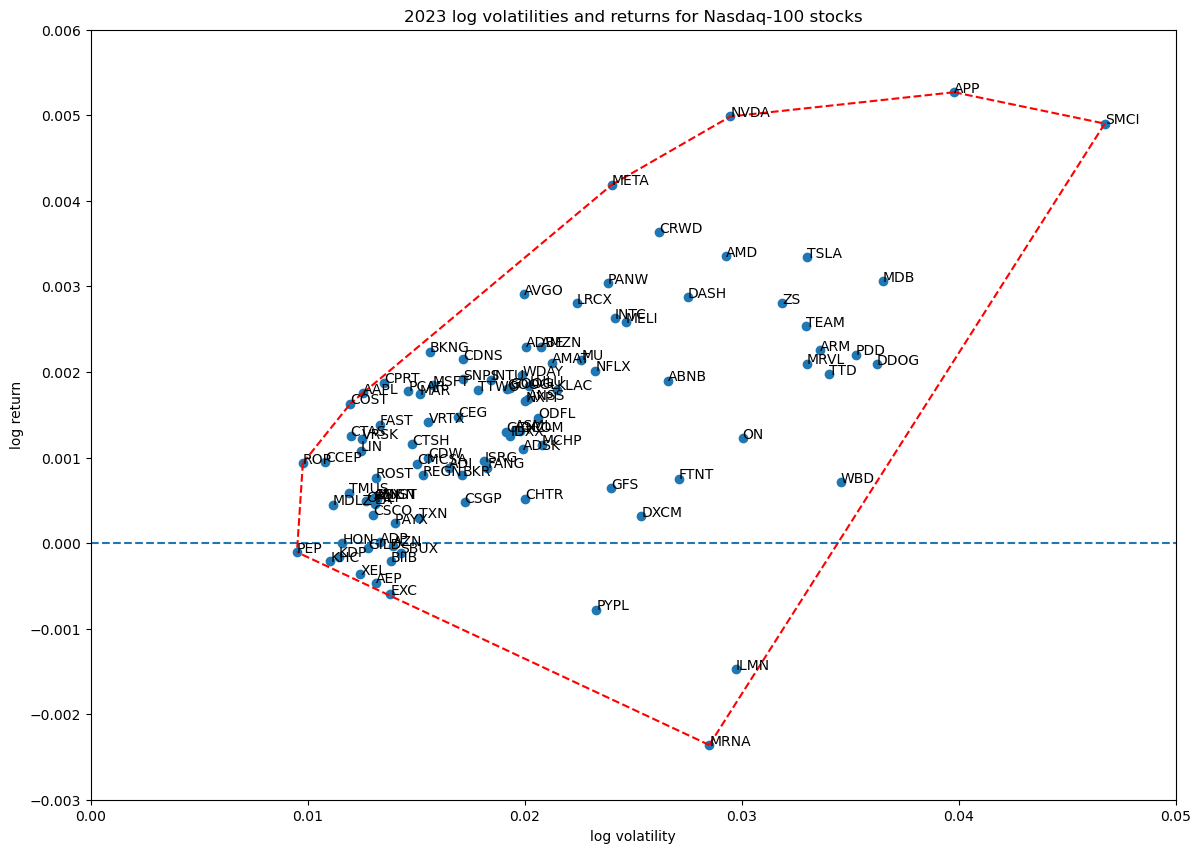

In [10]:
# calling simulate_portfolios() with num_simulations=0 just gets the bare stocks' volatilities and returns
portfolios = simulate_portfolios(df_r, portfolio_size=0, num_simulations=0)
hull_bare = plot_portfolios(bare, portfolios, '2023 log volatilities and returns for Nasdaq-100 stocks')

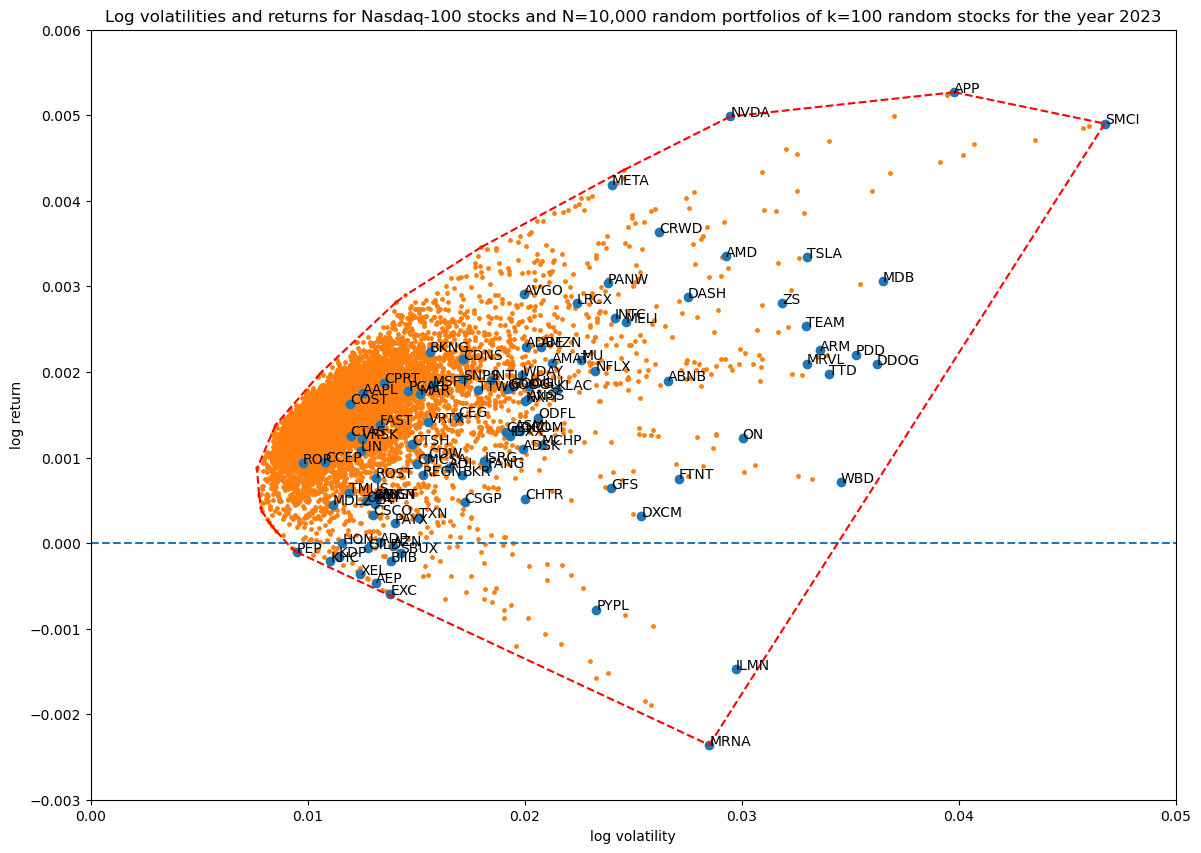

In [11]:
unit_random = unit_random_angle_projection
num_simulations = 10_000
portfolio_size = 100
title = f'Log volatilities and returns for Nasdaq-100 stocks and N={num_simulations:,} random portfolios of k={portfolio_size} random stocks for the year 2023'
portfolios = simulate_portfolios(df_r, portfolio_size, num_simulations)
_ = plot_portfolios(bare, portfolios, title)

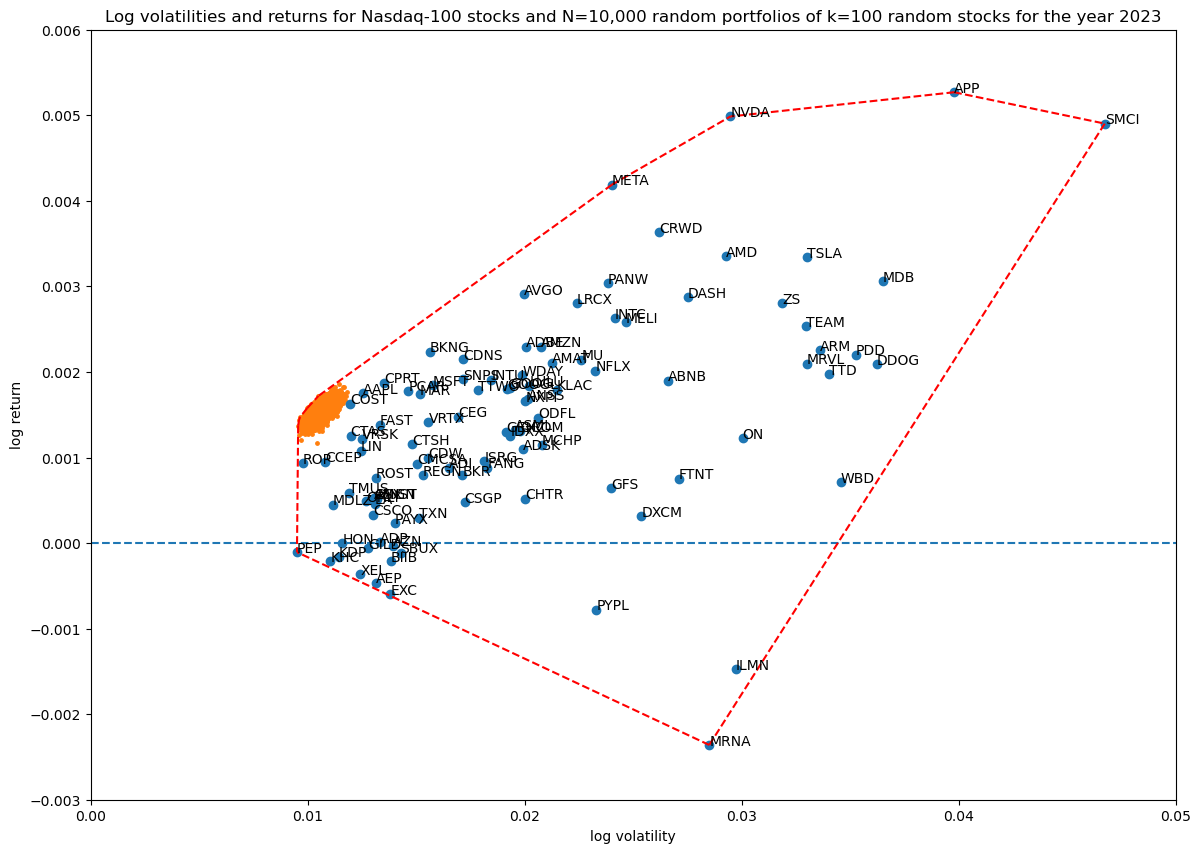

In [12]:
unit_random = unit_random_simple
num_simulations = 10_000
portfolio_size = 100
title = f'Log volatilities and returns for Nasdaq-100 stocks and N={num_simulations:,} random portfolios of k={portfolio_size} random stocks for the year 2023'
portfolios = simulate_portfolios(df_r, portfolio_size, num_simulations)
_ = plot_portfolios(bare, portfolios, title)

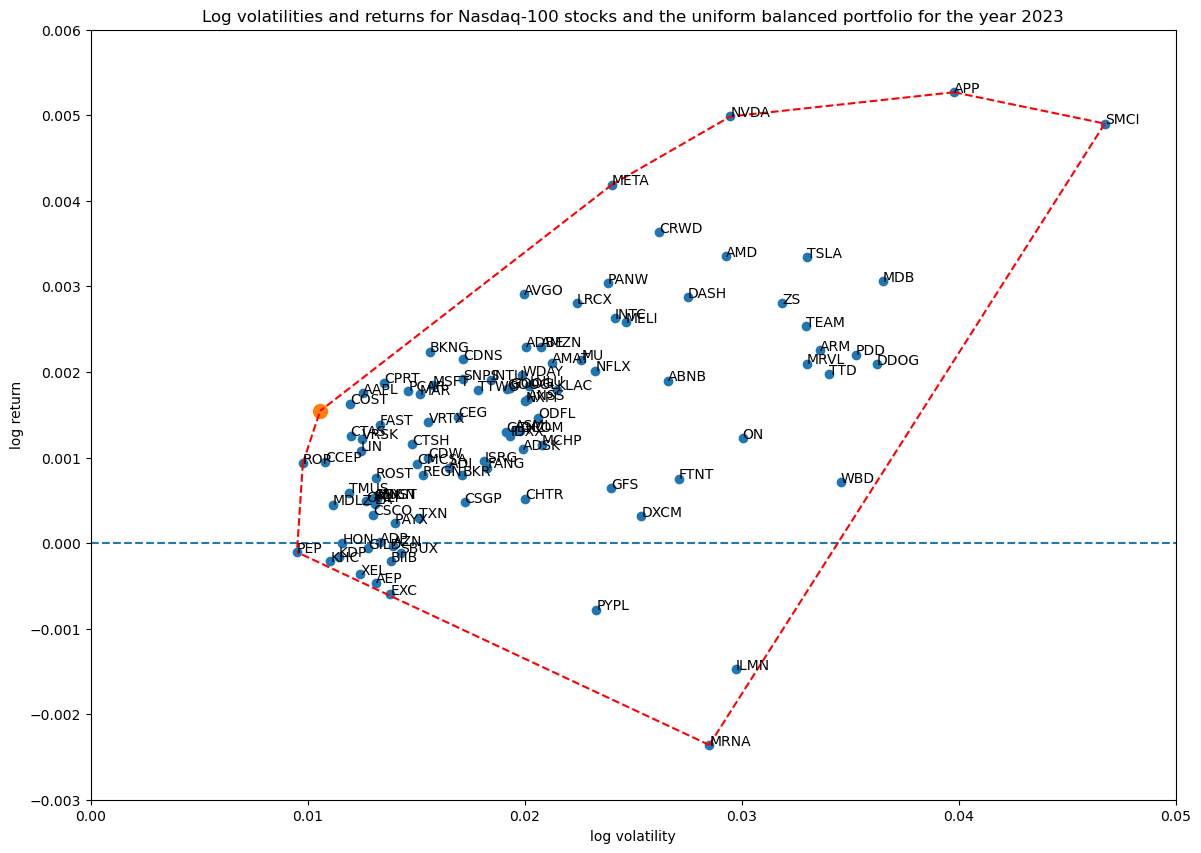

In [13]:
title = f'Log volatilities and returns for Nasdaq-100 stocks and the uniform balanced portfolio for the year 2023'
portfolios = portfolio_returns(df_r, [np.ones(len(tickers))/len(tickers)])
_ = plot_portfolios(bare, portfolios, title, portfolio_point_size=100)

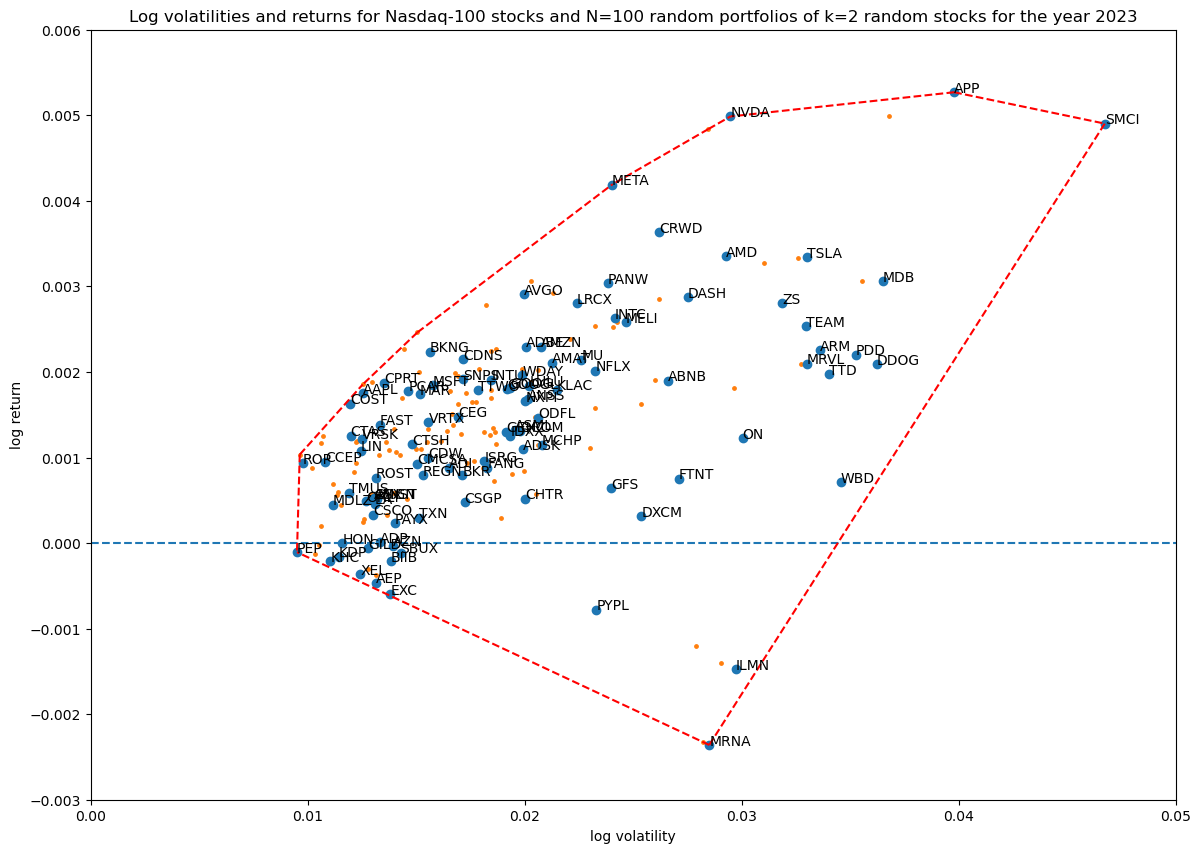

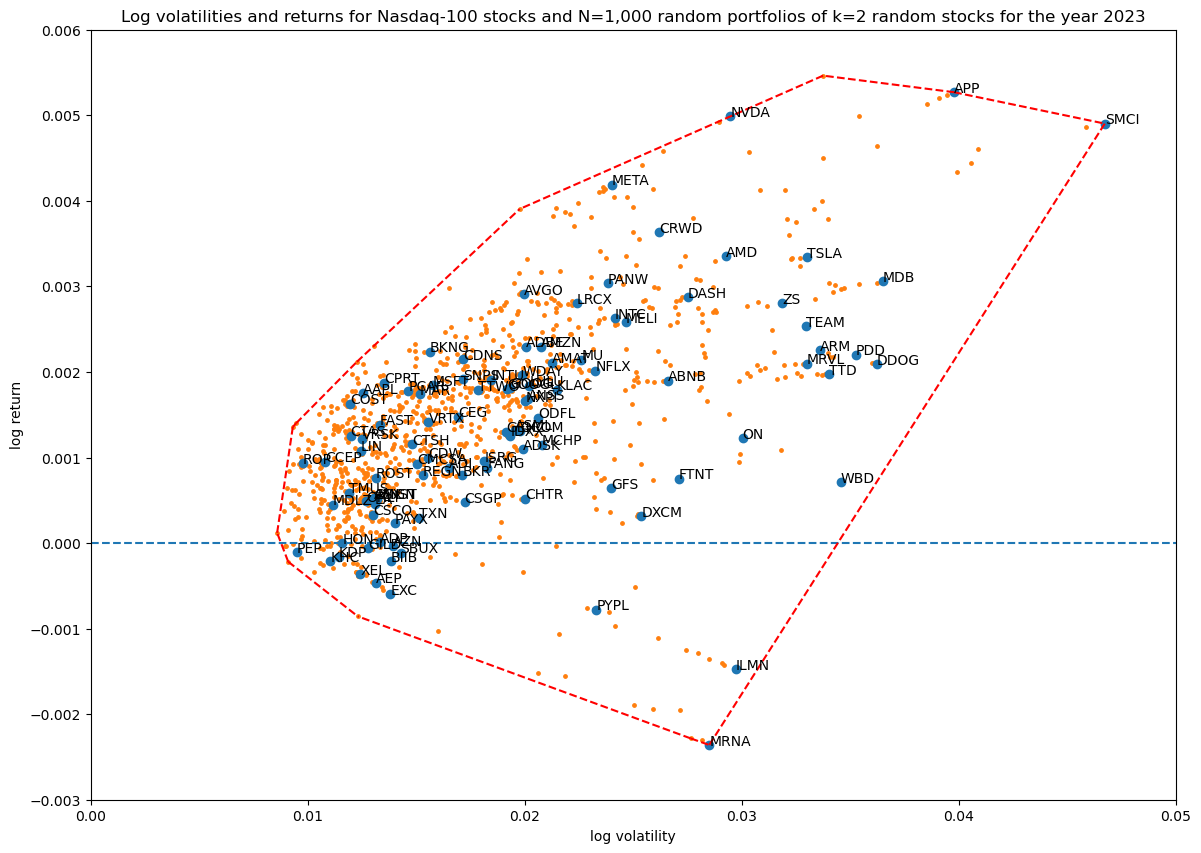

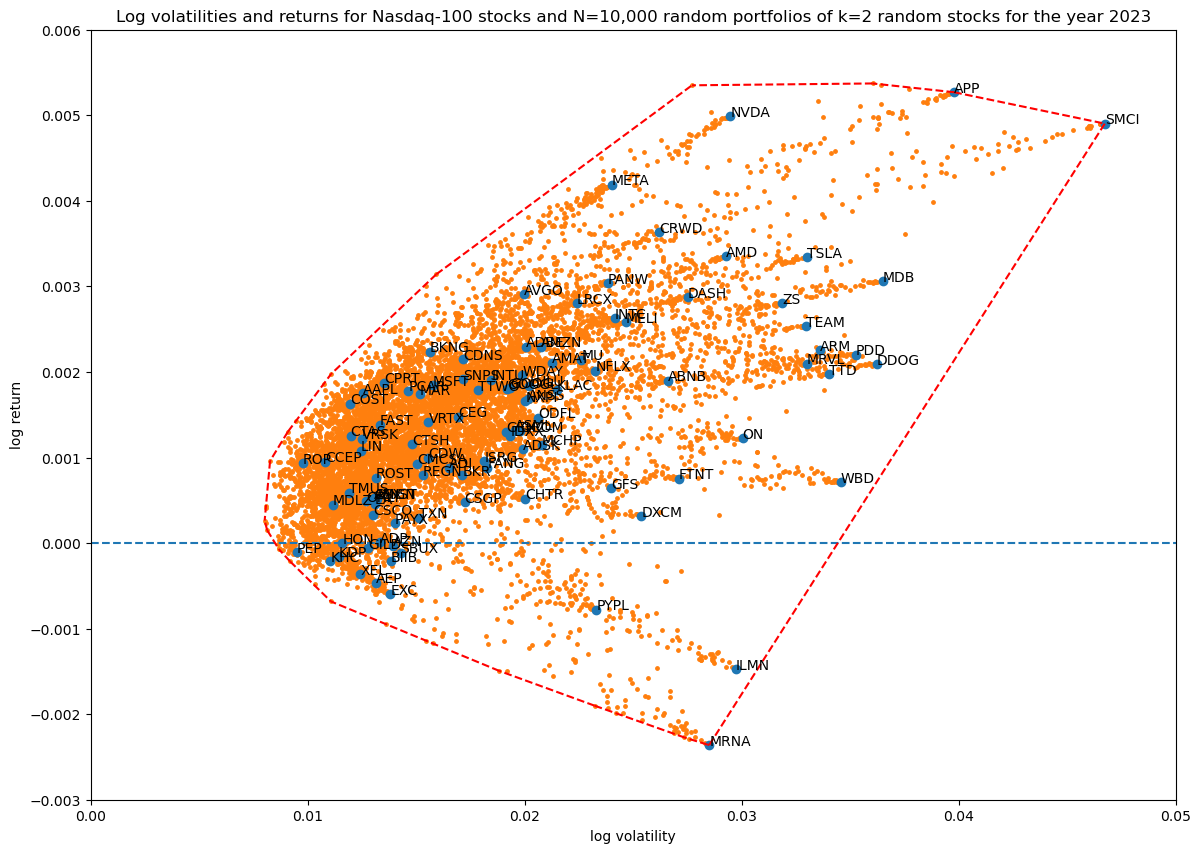

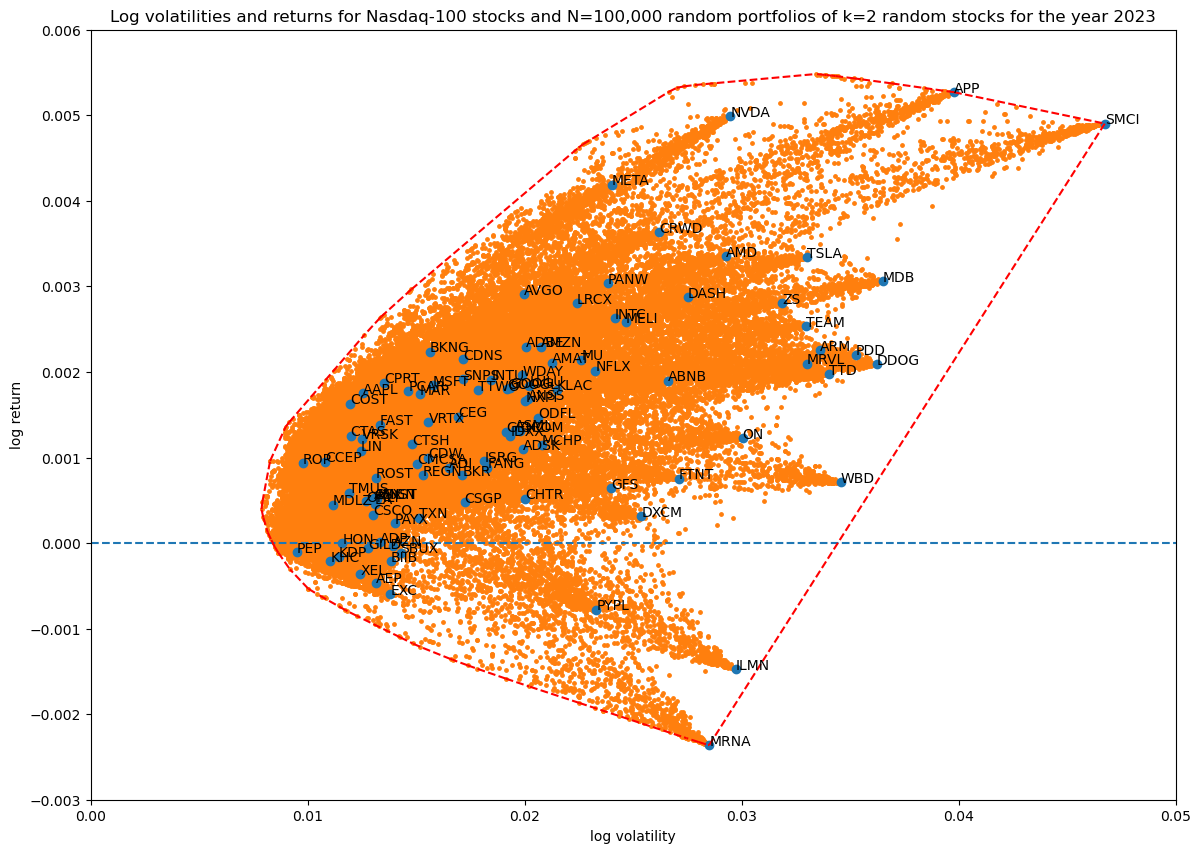

In [14]:
unit_random = unit_random_angle_projection
portfolio_size = 2
for num_simulations in [100, 1_000, 10_000, 100_000]:
    title = f'Log volatilities and returns for Nasdaq-100 stocks and N={num_simulations:,} random portfolios of k={portfolio_size} random stocks for the year 2023'
    portfolios = simulate_portfolios(df_r, portfolio_size, num_simulations)
    hulls[portfolio_size][num_simulations] = plot_portfolios(bare, portfolios, title)

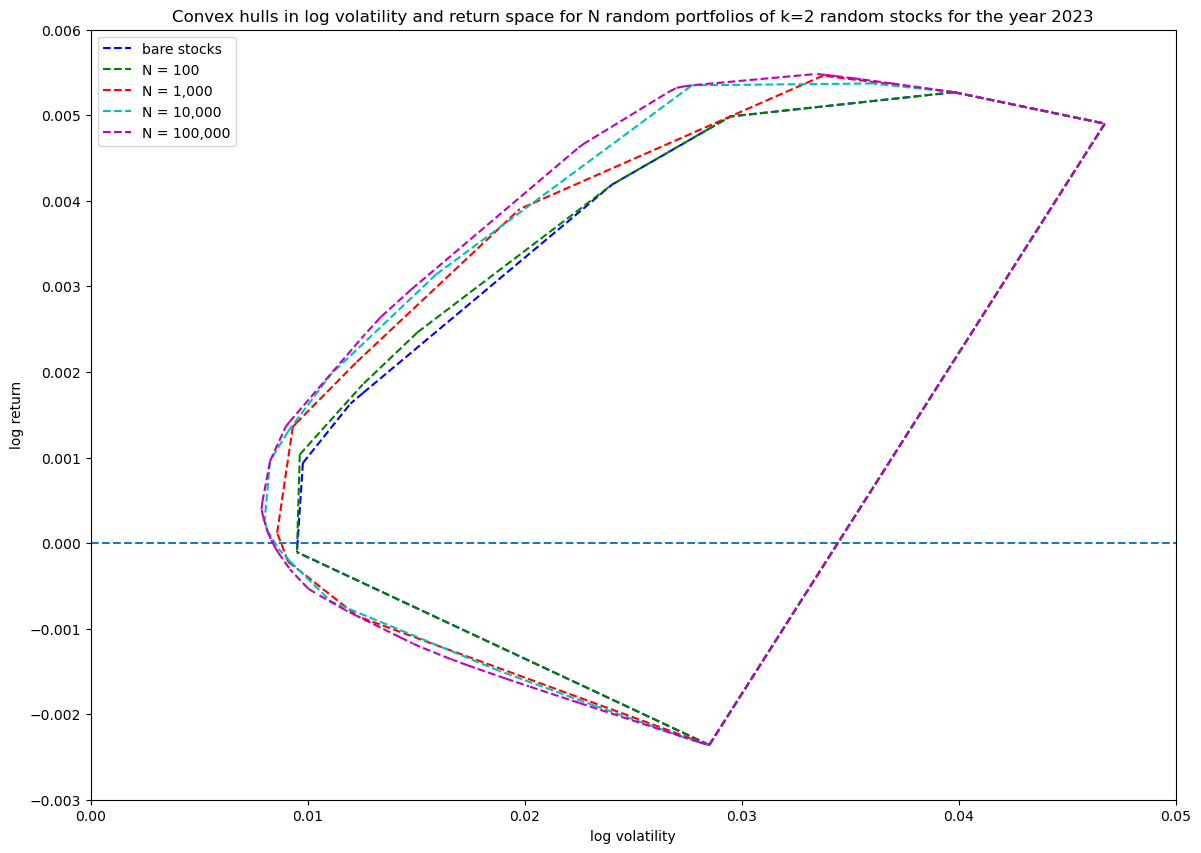

In [15]:
# make list of hulls
Ns = [100, 1000, 10_000, 100_000]
hs = [hull_bare] + [hulls[2][i] for i in Ns]
legends = ['bare stocks'] + [f'N = {i:,}' for i in Ns]
# set up plot
fig, ax = plt.subplots(figsize=(14, 10))
ax.axhline(0, linestyle='--')
plt.xlabel('log volatility')
plt.ylabel('log return')
plt.title(f'Convex hulls in log volatility and return space for N random portfolios of k=2 random stocks for the year 2023')
plt.xlim((0, 0.05))
plt.ylim((-0.003, 0.006))
# plot hulls
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i, hull in enumerate(hs):
    hxs, hys = hull
    for k, (x, y) in enumerate(zip(hxs, hys)):
        plt.plot(x, y, f'{colors[i]}--', label=legends[i] if k == 0 else None)
plt.legend()

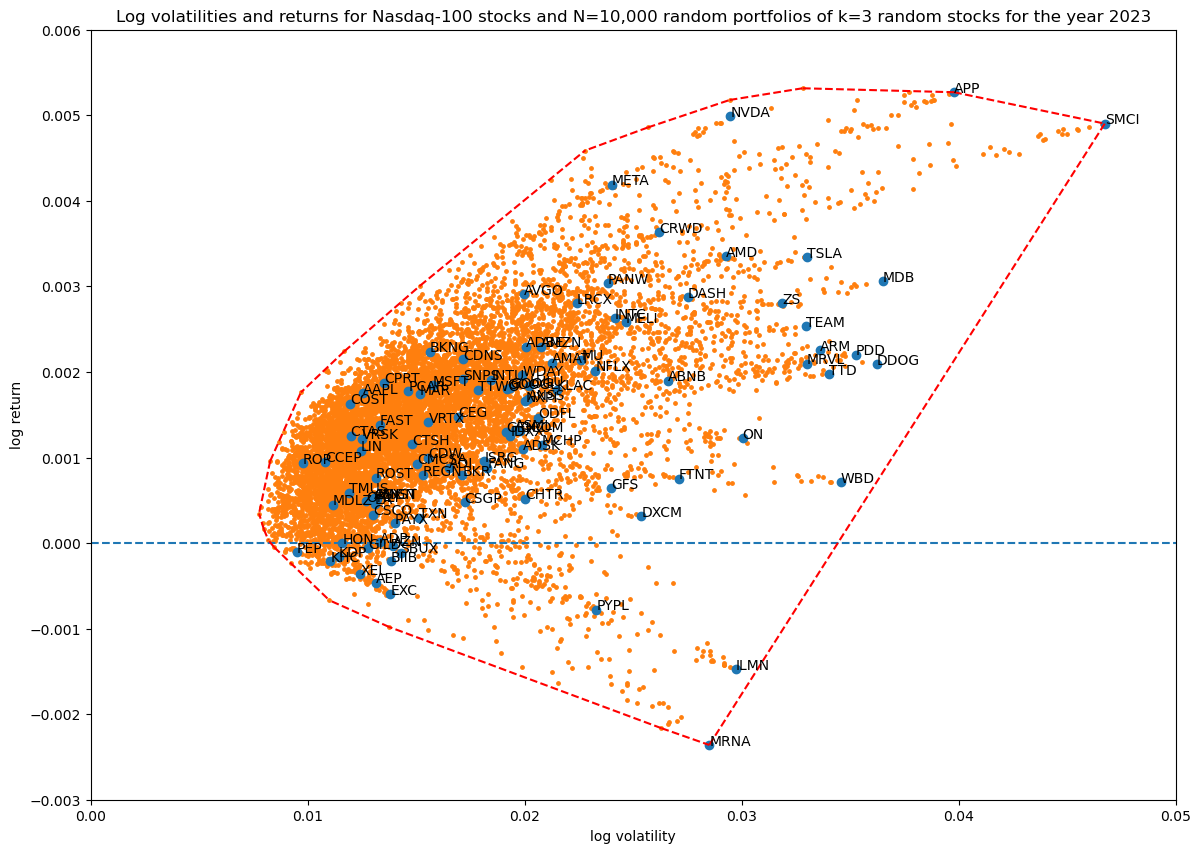

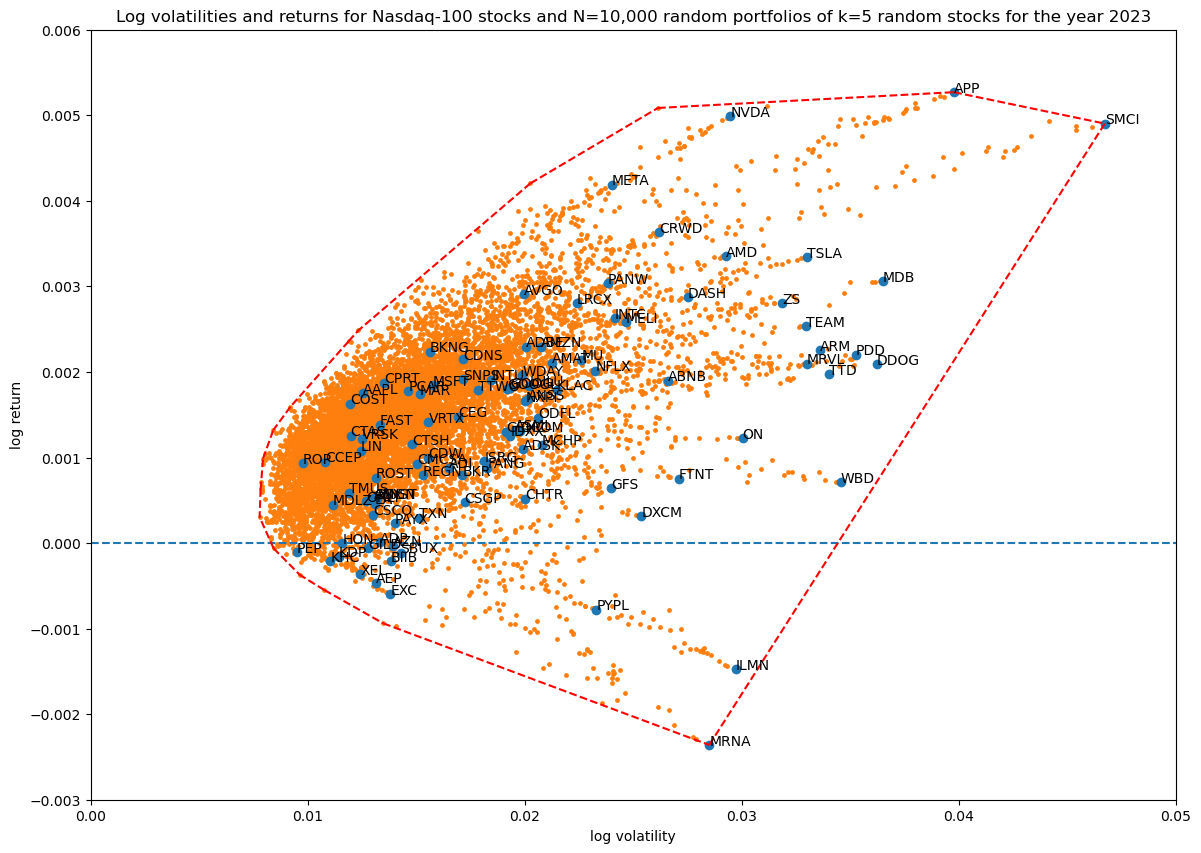

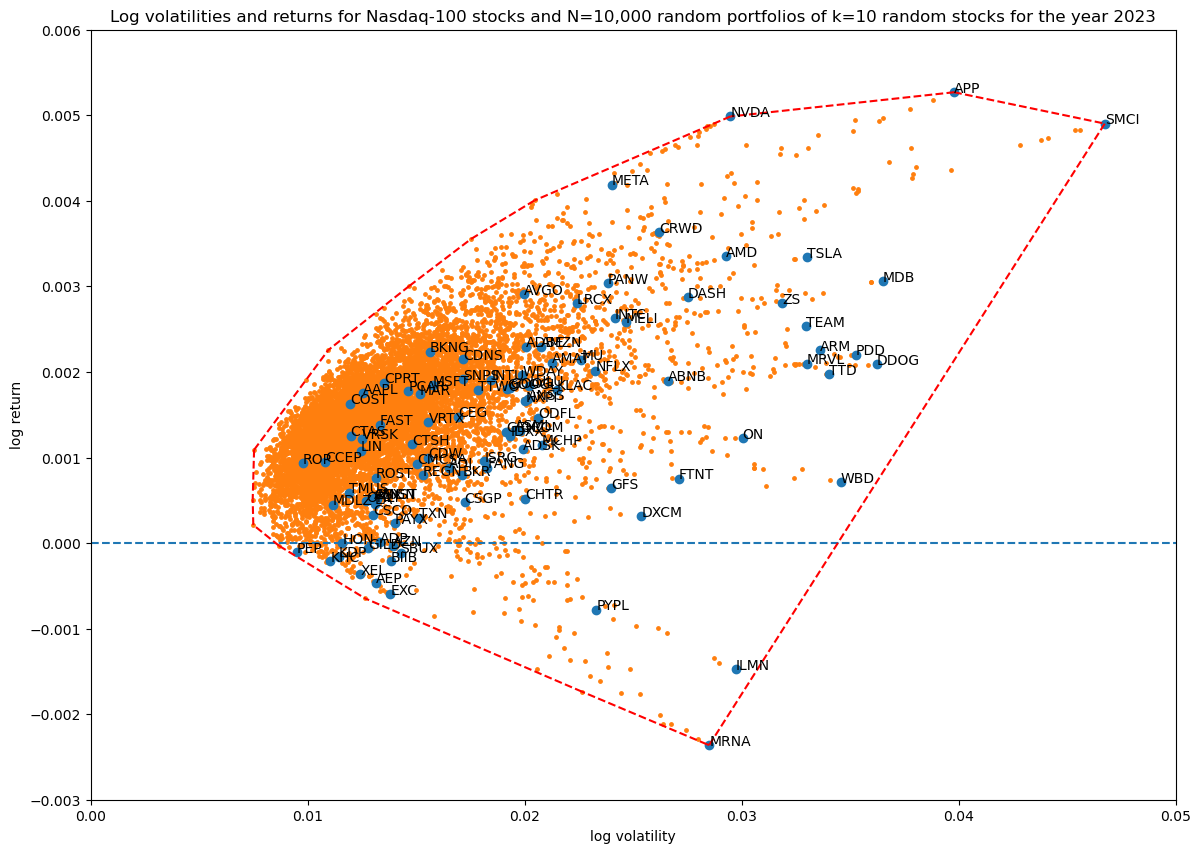

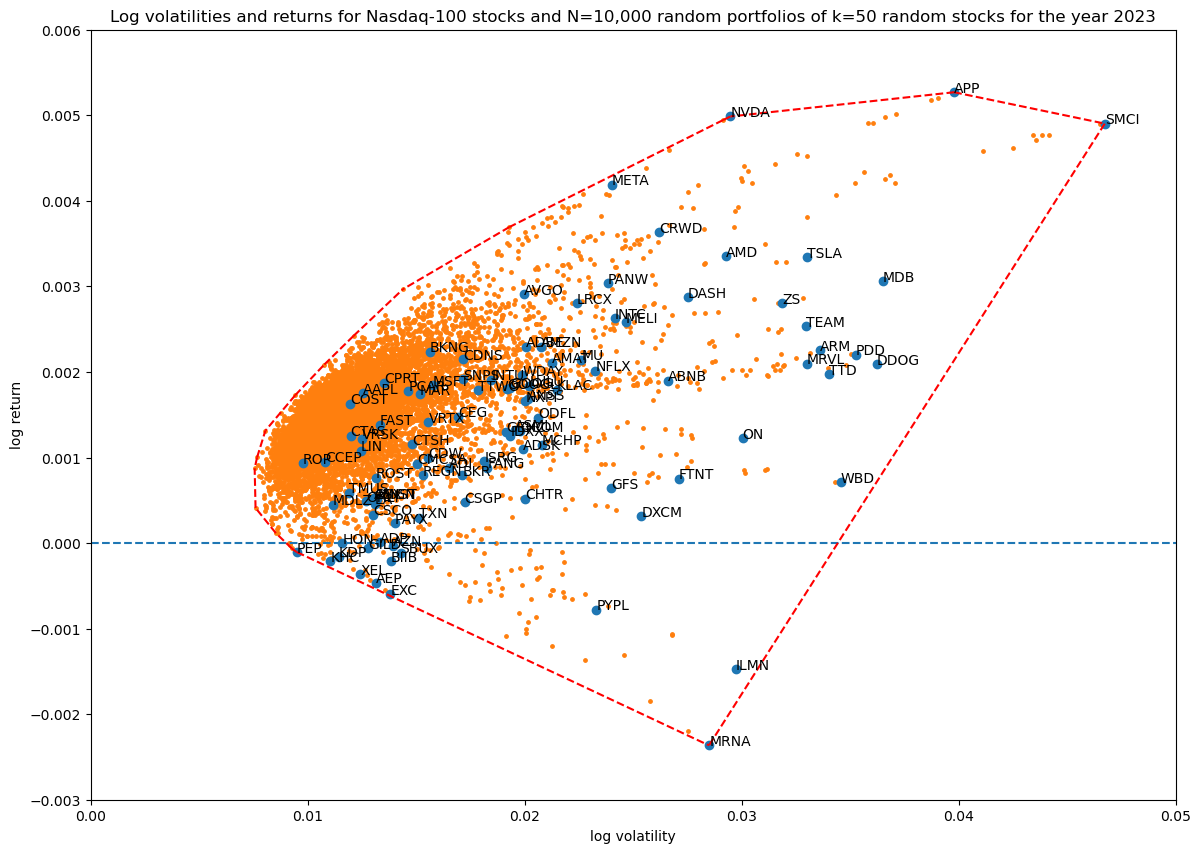

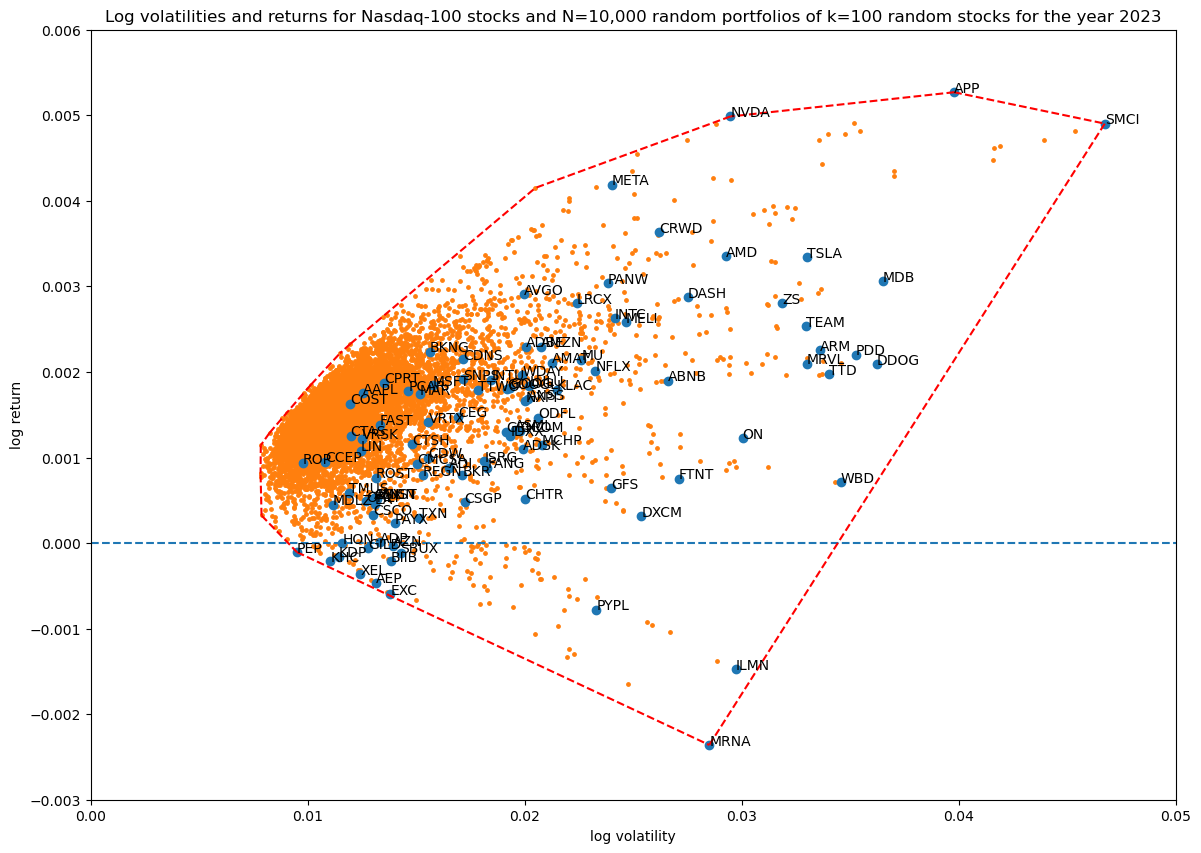

In [16]:
unit_random = unit_random_angle_projection
num_simulations = 10_000
for portfolio_size in [3, 5, 10, 50, 100]:
    title = f'Log volatilities and returns for Nasdaq-100 stocks and N={num_simulations:,} random portfolios of k={portfolio_size} random stocks for the year 2023'
    portfolios = simulate_portfolios(df_r, portfolio_size, num_simulations)
    hulls[portfolio_size][num_simulations] = plot_portfolios(bare, portfolios, title)

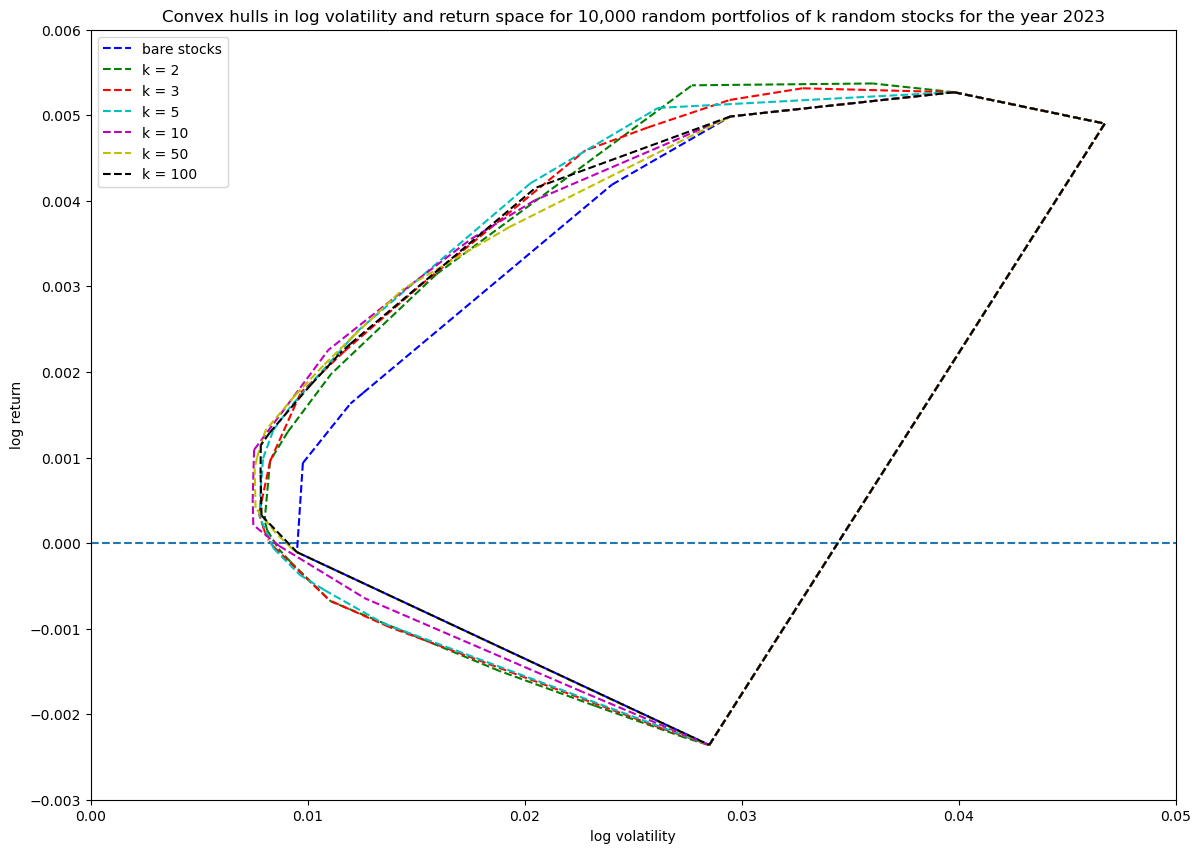

In [17]:
# make list of hulls
ks = [2, 3, 5, 10, 50, 100]
N = 10_000
hs = [hull_bare] + [hulls[k][N] for k in ks]
legends = ['bare stocks'] + [f'k = {k:,}' for k in ks]
# set up plot
fig, ax = plt.subplots(figsize=(14, 10))
ax.axhline(0, linestyle='--')
plt.xlabel('log volatility')
plt.ylabel('log return')
plt.title(f'Convex hulls in log volatility and return space for {N:,} random portfolios of k random stocks for the year 2023')
plt.xlim((0, 0.05))
plt.ylim((-0.003, 0.006))
# plot hulls
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i, hull in enumerate(hs):
    hxs, hys = hull
    for k, (x, y) in enumerate(zip(hxs, hys)):
        plt.plot(x, y, f'{colors[i]}--', label=legends[i] if k == 0 else None)
plt.legend()

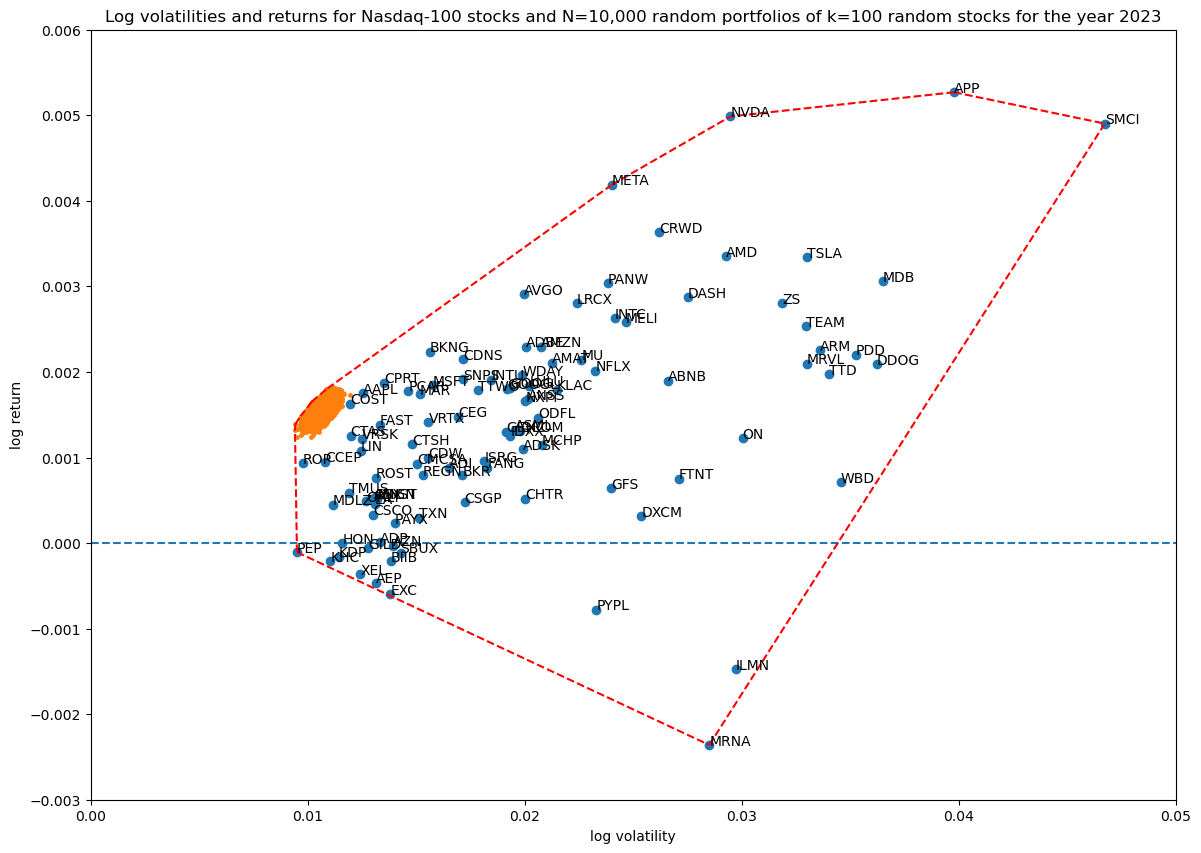

In [18]:
# repeating for N=10,000 and k=100, but with naive randomization shows that with a nearly uniform portfolio
# the coverage in log volatility-return space is limited; essentially it's clustering around the 1/n uniform portfolio
unit_random = unit_random_simple
num_simulations = 10_000
portfolio_size = 100
title = f'Log volatilities and returns for Nasdaq-100 stocks and N={num_simulations:,} random portfolios of k={portfolio_size} random stocks for the year 2023'
portfolios = simulate_portfolios(df_r, portfolio_size, num_simulations)
_ = plot_portfolios(bare, portfolios, title)

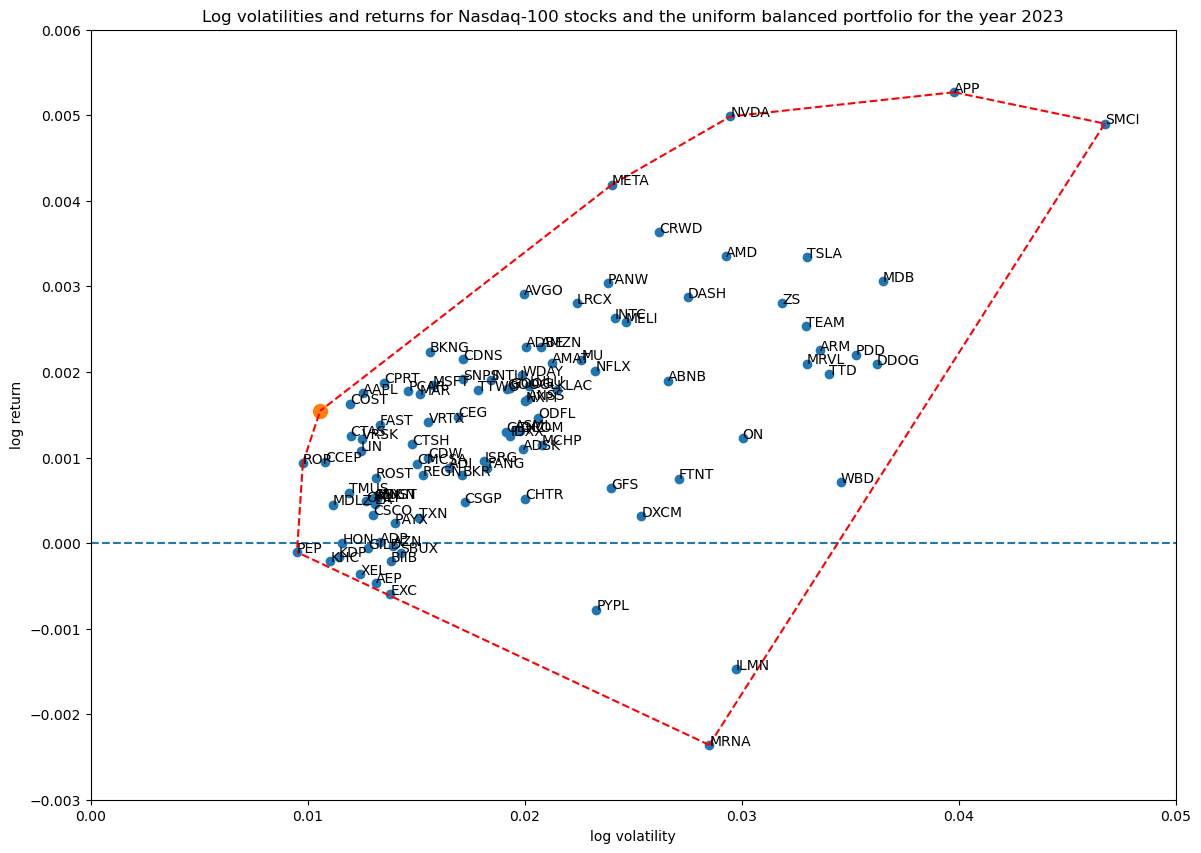

In [19]:
# repeating for N=10,000 and k=100, but with naive randomization shows that with a nearly uniform portfolio
# the coverage in log volatility-return space is limited; essentially it's clustering around the 1/n uniform portfolio
unit_random = unit_random_simple
num_simulations = 10_000
portfolio_size = 100
title = f'Log volatilities and returns for Nasdaq-100 stocks and the uniform balanced portfolio for the year 2023'
portfolios = portfolio_returns(df_r, [np.ones(len(tickers))/len(tickers)])
_ = plot_portfolios(bare, portfolios, title, portfolio_point_size=100)

In [20]:
def plot_portfolios_only(portfolios, title):
    pxs, pys = portfolios
    points = np.array([[x, y] for x, y in zip(pxs, pys)])
    hull = ConvexHull(points)
    # set up plot
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.axhline(0, linestyle='--')
    plt.xlabel('log volatility')
    plt.ylabel('log return')
    plt.title(title)
    plt.xlim((0, 0.05))
    plt.ylim((-0.003, 0.006))
    # plot portfolio points
    ax.scatter(pxs, pys, zorder=0, s=6)
    # save hull simplexes
    hxs = [points[simplex, 0] for simplex in hull.simplices]
    hys = [points[simplex, 1] for simplex in hull.simplices]
    # plot convex hull
    for x, y in zip(hxs, hys):
        plt.plot(x, y, 'r--')
    return hxs, hys

hulls_ponly = defaultdict(lambda: defaultdict())

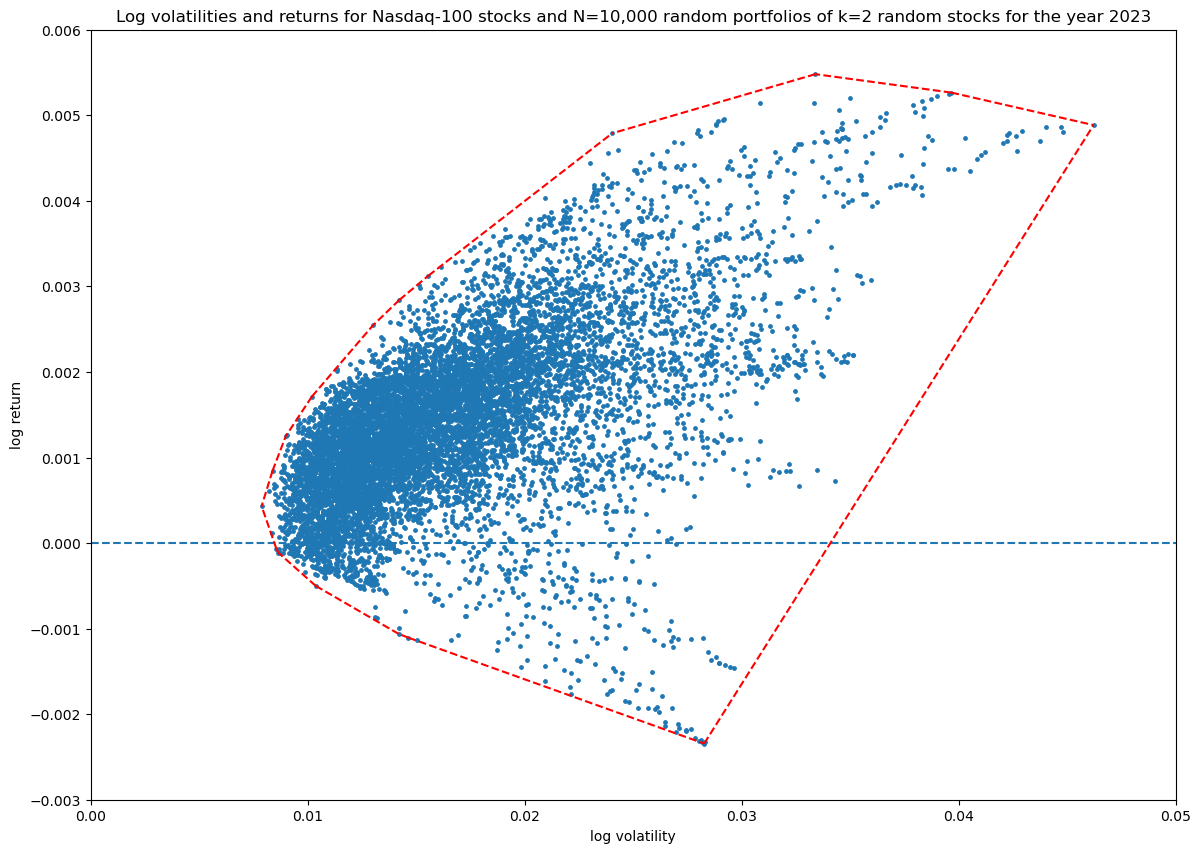

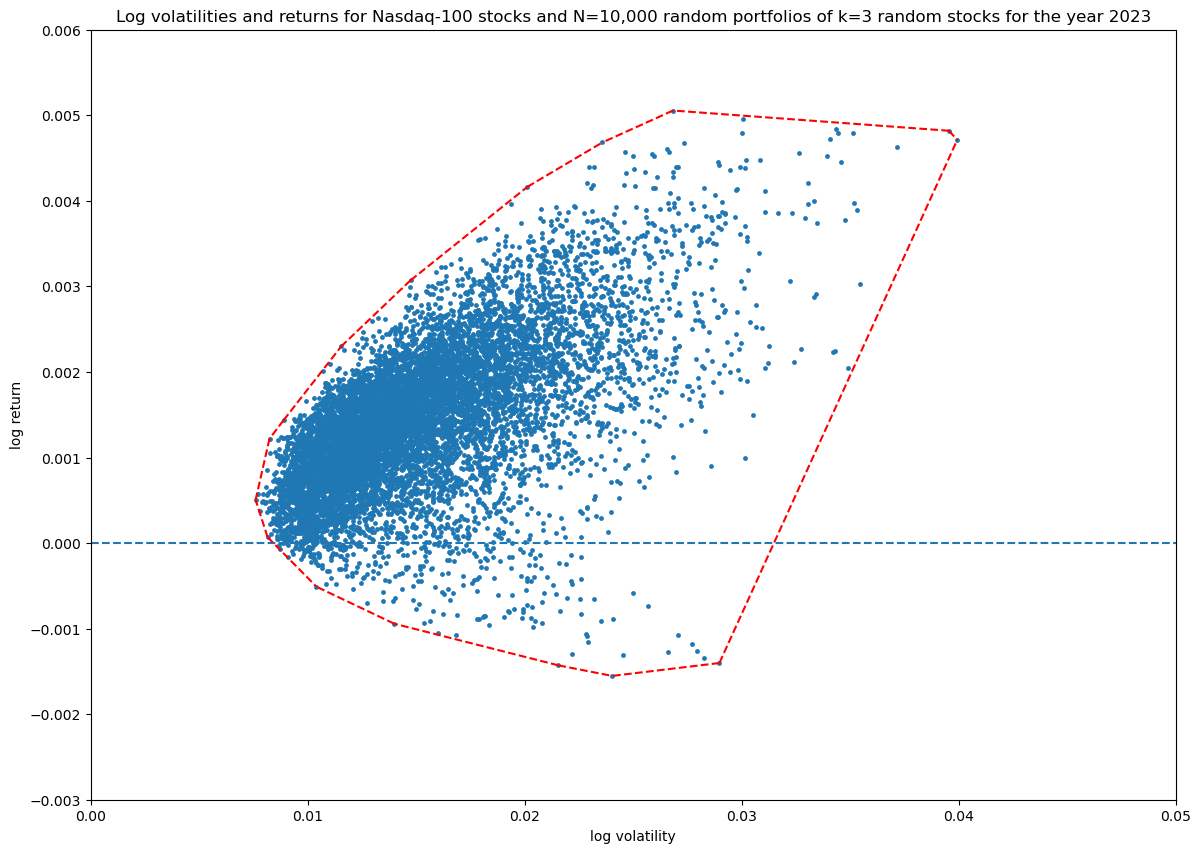

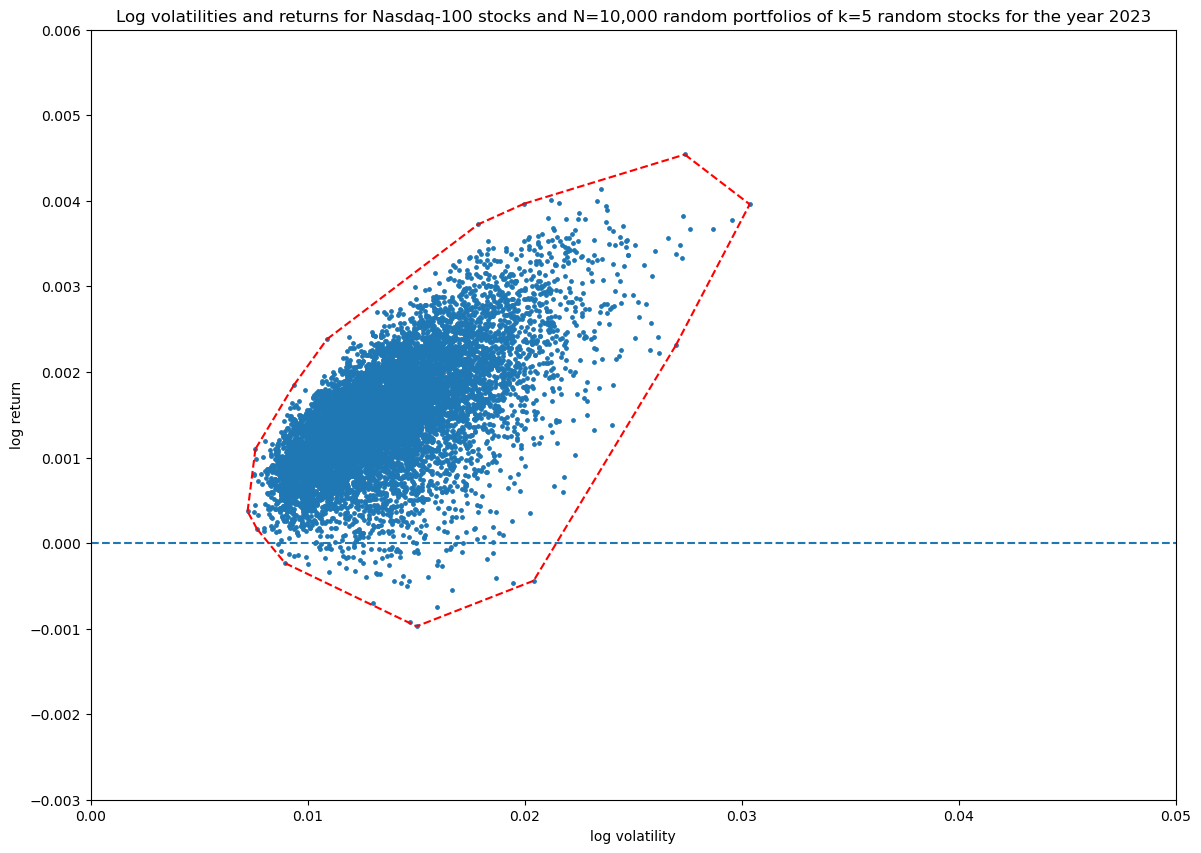

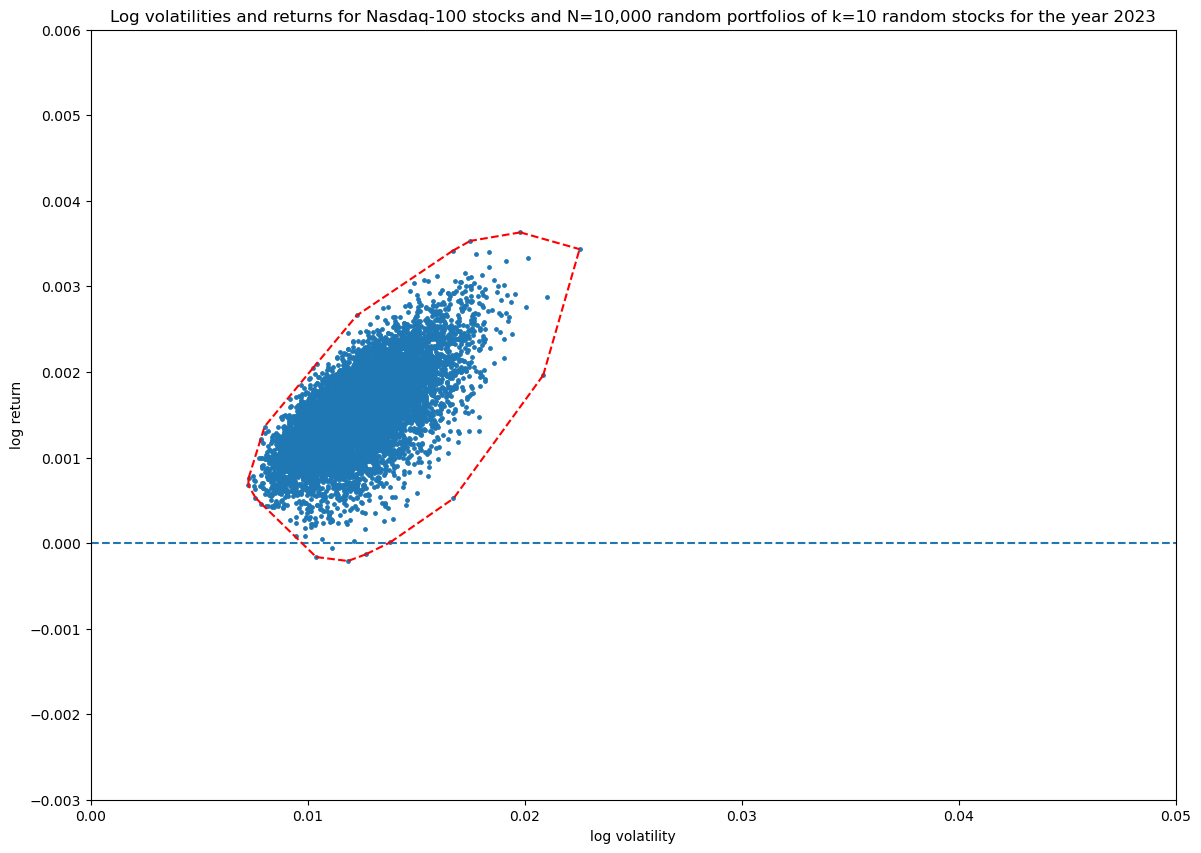

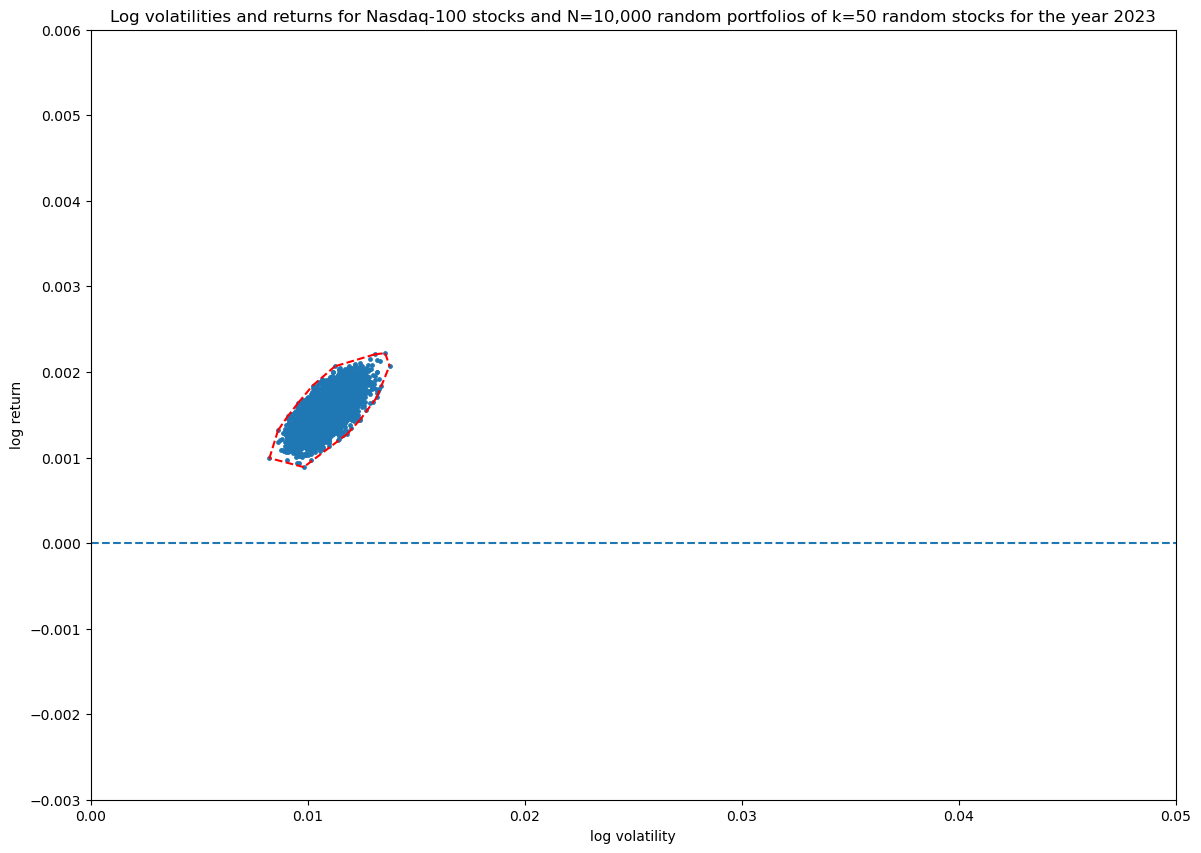

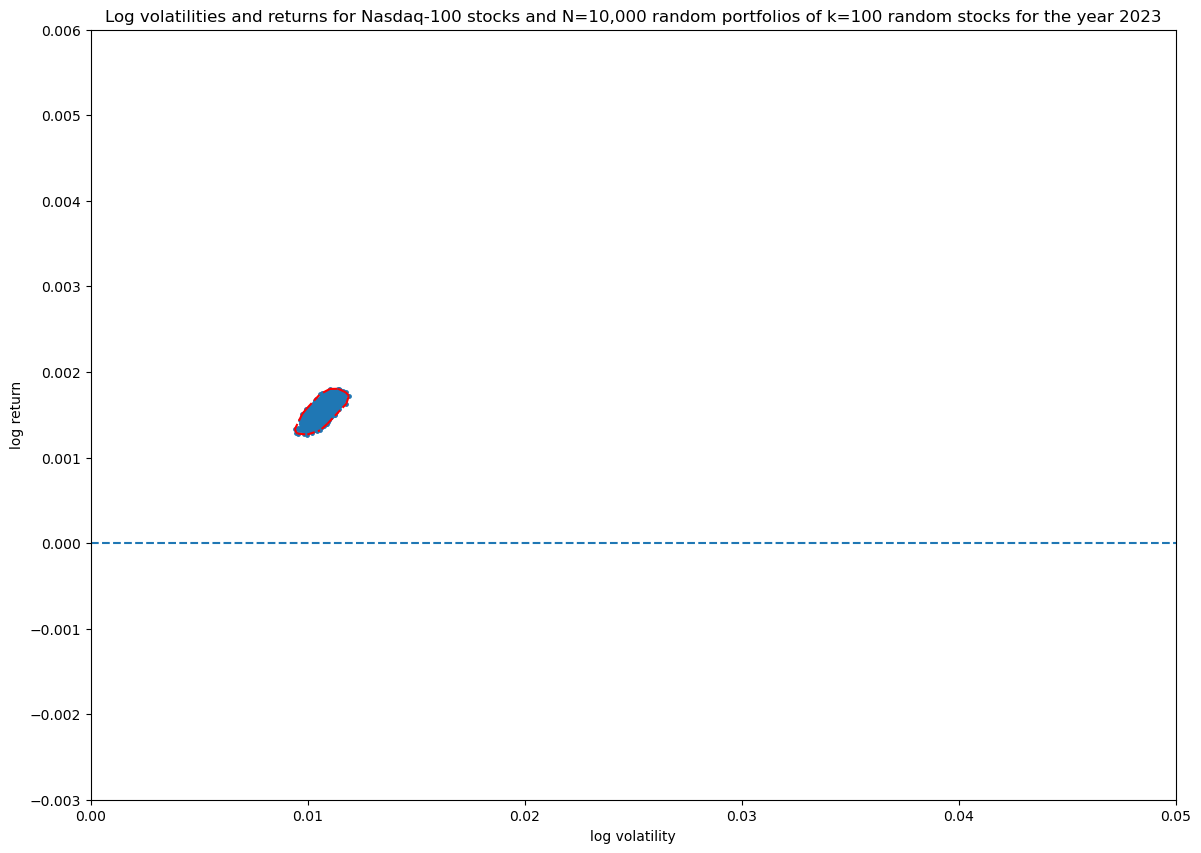

In [21]:
unit_random=unit_random_simple

num_simulations = 10_000
for portfolio_size in [2, 3, 5, 10, 50, 100]:
    title = f'Log volatilities and returns for Nasdaq-100 stocks and N={num_simulations:,} random portfolios of k={portfolio_size} random stocks for the year 2023'
    portfolios = simulate_portfolios(df_r, portfolio_size, num_simulations)
    hulls_ponly[portfolio_size][num_simulations] = plot_portfolios_only(portfolios, title)

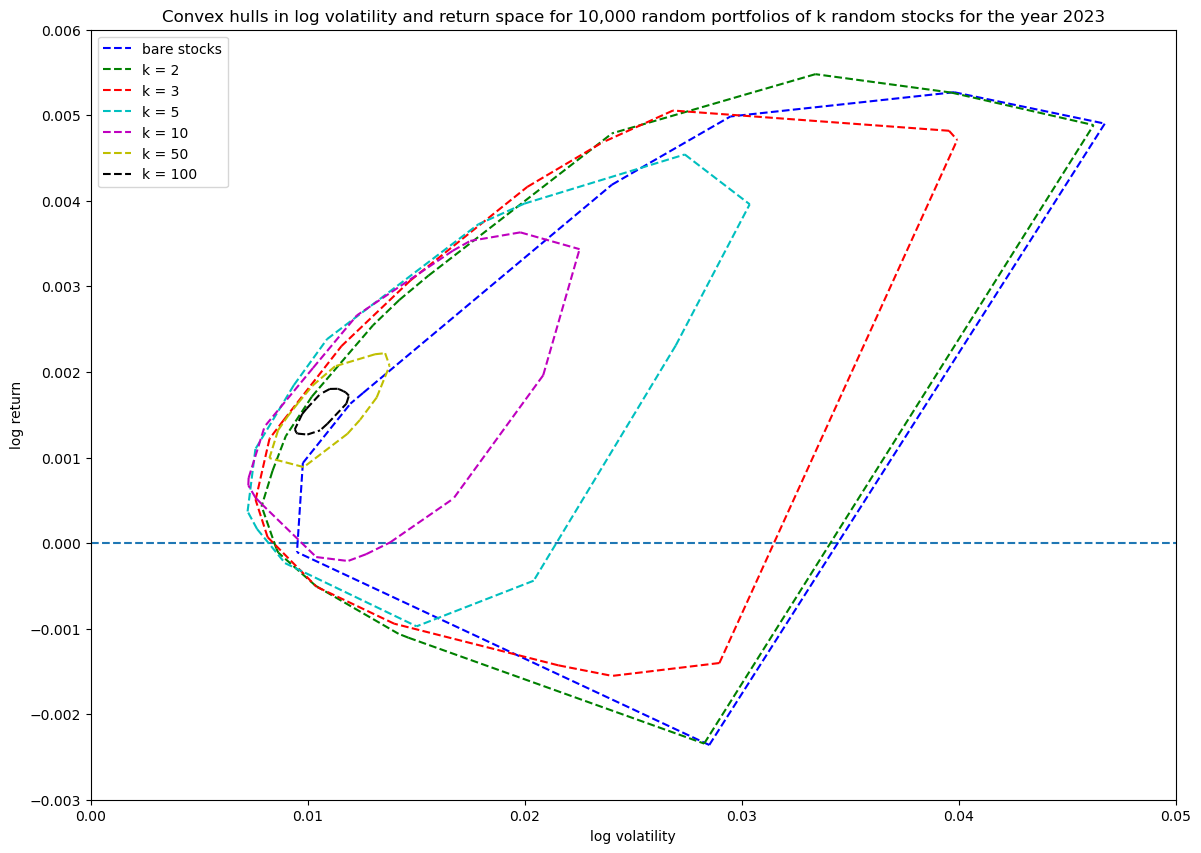

In [22]:
# make list of hulls
ks = [2, 3, 5, 10, 50, 100]
N = 10_000
hs = [hull_bare] + [hulls_ponly[k][N] for k in ks]
legends = ['bare stocks'] + [f'k = {k:,}' for k in ks]
# set up plot
fig, ax = plt.subplots(figsize=(14, 10))
ax.axhline(0, linestyle='--')
plt.xlabel('log volatility')
plt.ylabel('log return')
plt.title(f'Convex hulls in log volatility and return space for {N:,} random portfolios of k random stocks for the year 2023')
plt.xlim((0, 0.05))
plt.ylim((-0.003, 0.006))
# plot hulls
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i, hull in enumerate(hs):
    hxs, hys = hull
    for k, (x, y) in enumerate(zip(hxs, hys)):
        plt.plot(x, y, f'{colors[i]}--', label=legends[i] if k == 0 else None)
plt.legend()

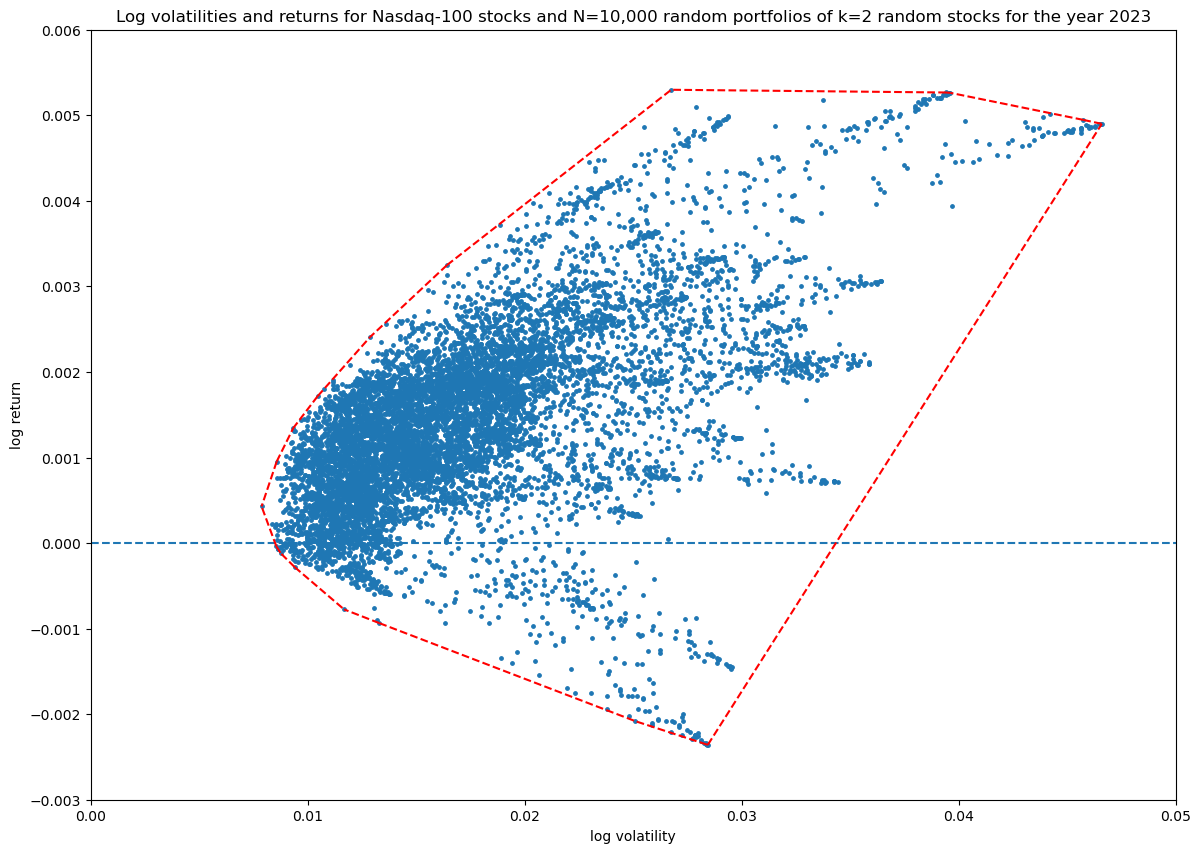

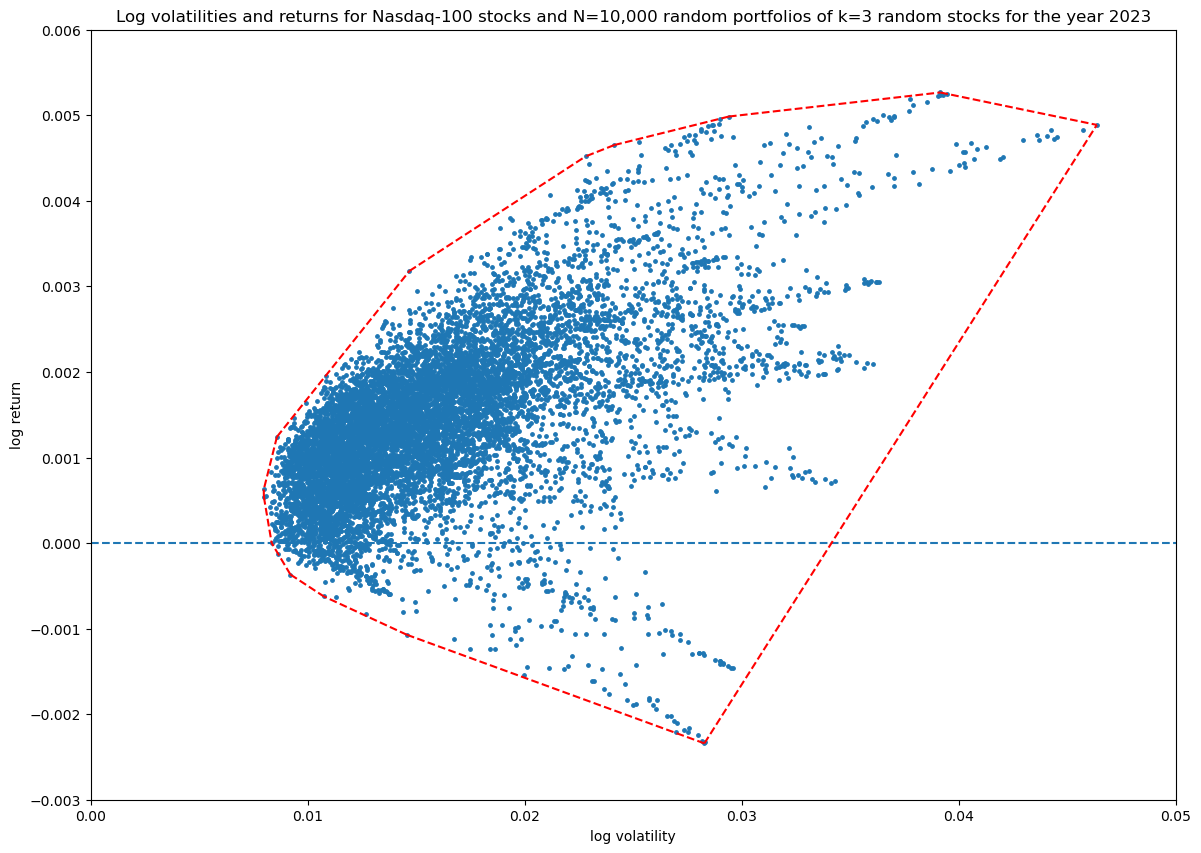

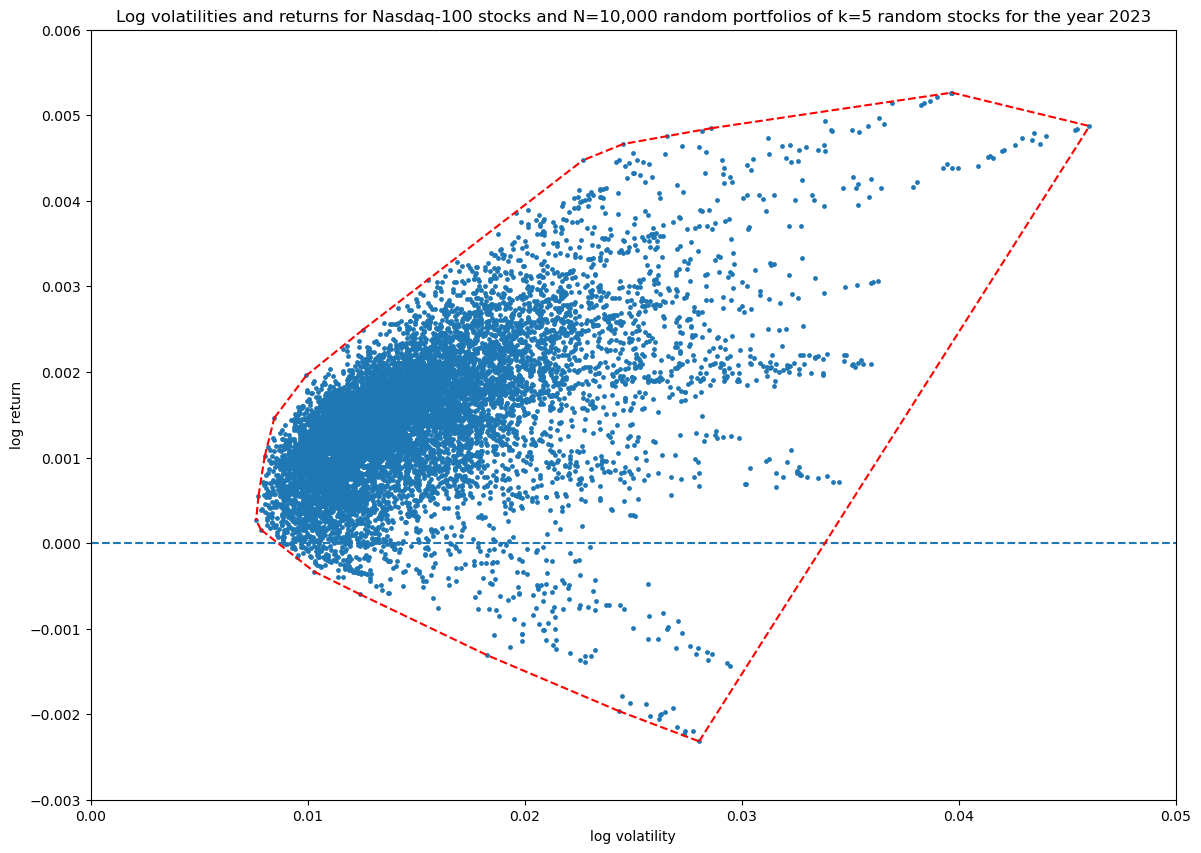

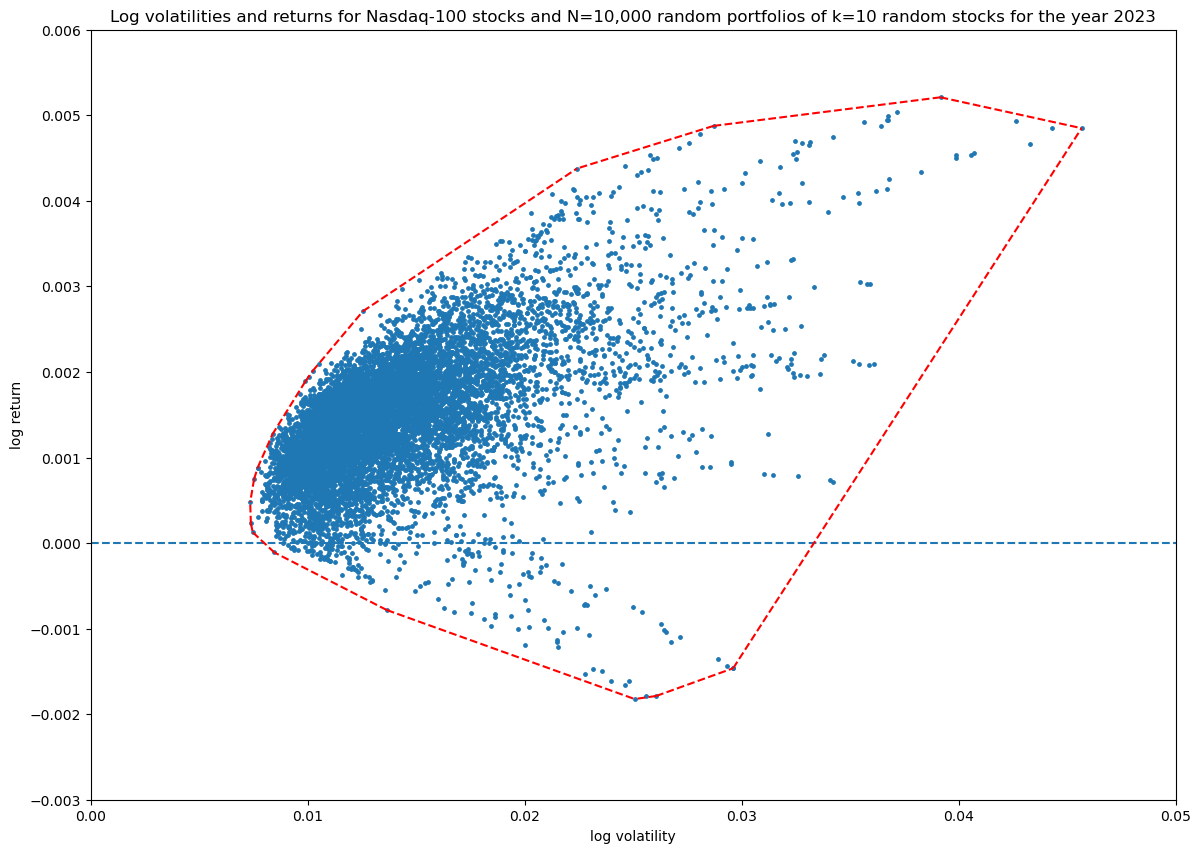

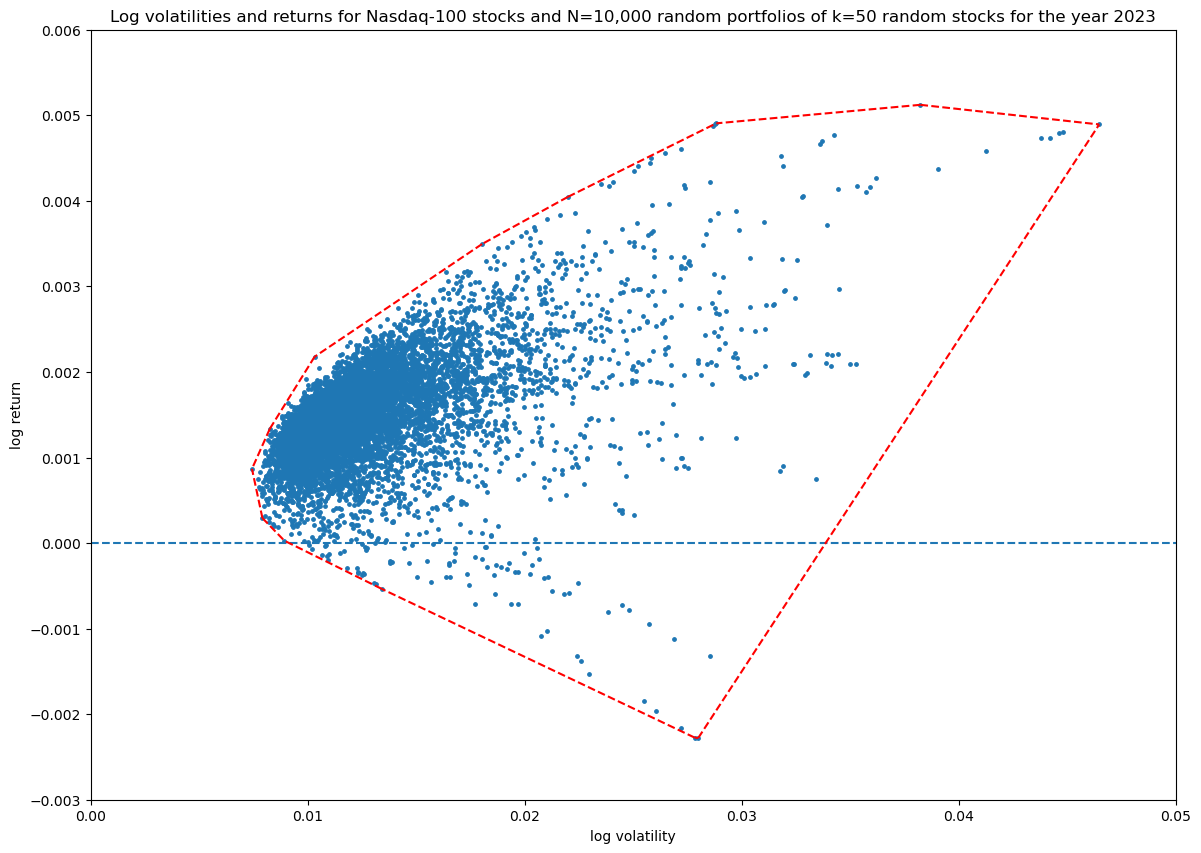

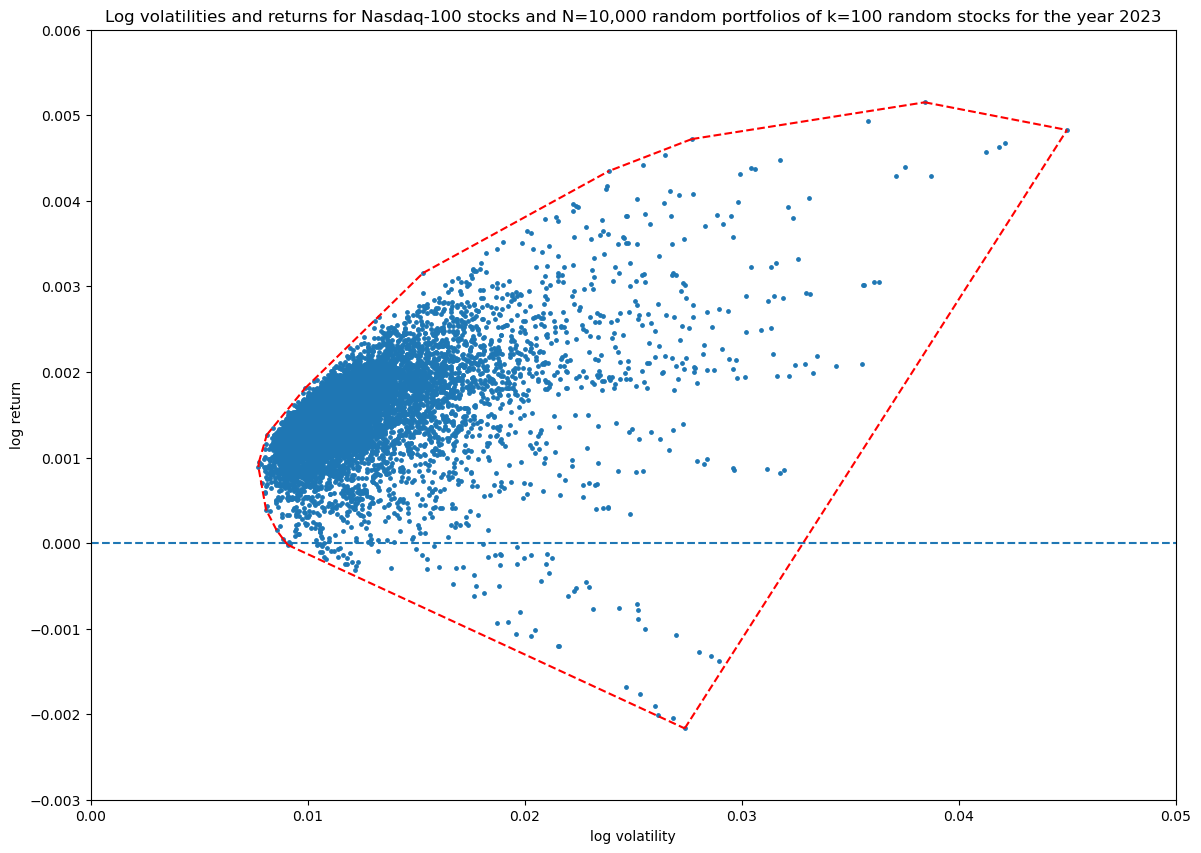

In [23]:
unit_random=unit_random_angle_projection
num_simulations = 10_000
for portfolio_size in [2, 3, 5, 10, 50, 100]:
    title = f'Log volatilities and returns for Nasdaq-100 stocks and N={num_simulations:,} random portfolios of k={portfolio_size} random stocks for the year 2023'
    portfolios = simulate_portfolios(df_r, portfolio_size, num_simulations)
    hulls_ponly[portfolio_size][num_simulations] = plot_portfolios_only(portfolios, title)

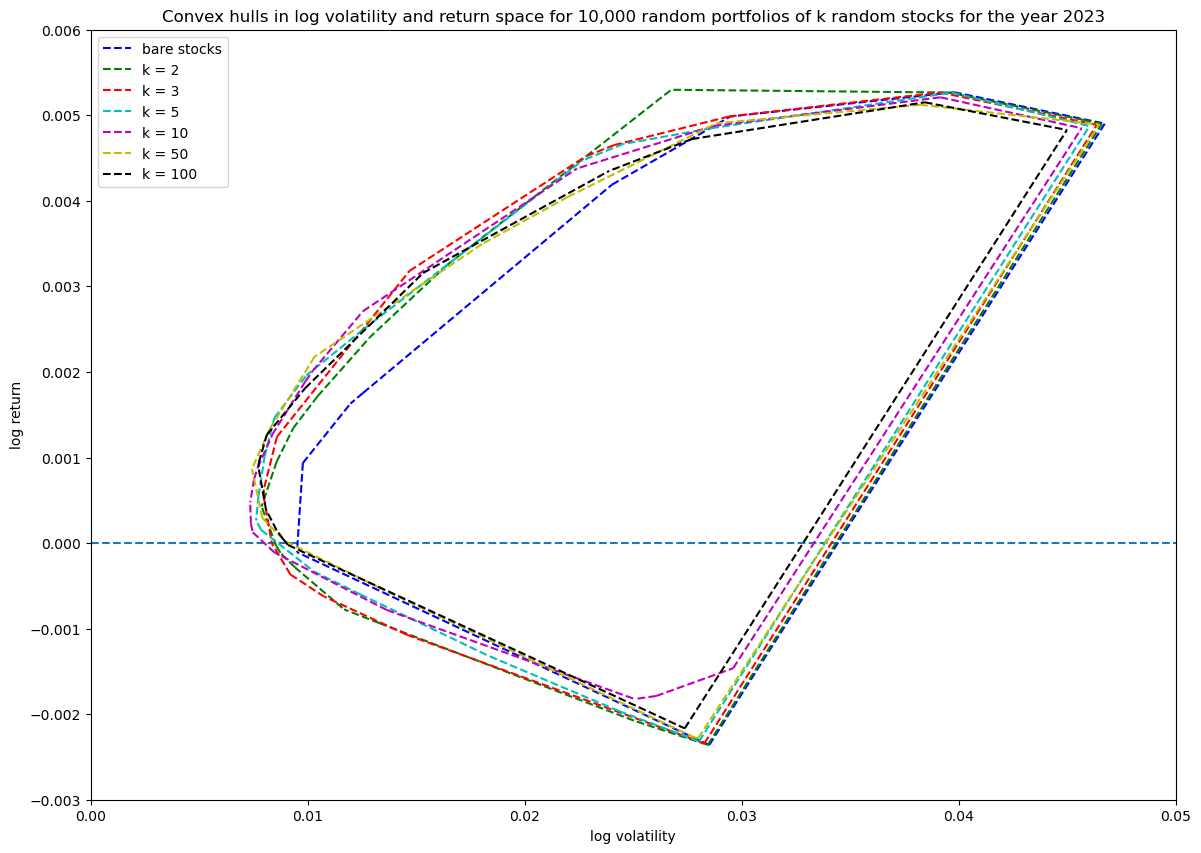

In [24]:
# make list of hulls
ks = [2, 3, 5, 10, 50, 100]
N = 10_000
hs = [hull_bare] + [hulls_ponly[k][N] for k in ks]
legends = ['bare stocks'] + [f'k = {k:,}' for k in ks]
# set up plot
fig, ax = plt.subplots(figsize=(14, 10))
ax.axhline(0, linestyle='--')
plt.xlabel('log volatility')
plt.ylabel('log return')
plt.title(f'Convex hulls in log volatility and return space for {N:,} random portfolios of k random stocks for the year 2023')
plt.xlim((0, 0.05))
plt.ylim((-0.003, 0.006))
# plot hulls
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i, hull in enumerate(hs):
    hxs, hys = hull
    for k, (x, y) in enumerate(zip(hxs, hys)):
        plt.plot(x, y, f'{colors[i]}--', label=legends[i] if k == 0 else None)
plt.legend()

In [25]:
random_portfolio(3, 2)

[0.0, 0.019352430074978357, 0.9806475699250217]

In [26]:
unit_random_simple(10)

array([0.06378549, 0.04425132, 0.00562915, 0.2112536 , 0.10956555,
       0.0625775 , 0.0878202 , 0.15235342, 0.06225669, 0.20050708])

In [27]:
unit_random_angle_projection(10)

array([0.06107238, 0.33599643, 0.0209793 , 0.05858181, 0.02180567,
       0.08195304, 0.08325727, 0.18795957, 0.13919473, 0.0091998 ])